<a href="https://colab.research.google.com/github/marcochisci/Anomaly_detection/blob/main/Finding_periods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain

Values every hour for a week

,Precipitazione [mm]
Date,
2021-12-02 00:00:00,0
2021-12-02 01:00:00,0
2021-12-02 02:00:00,0
2021-12-02 03:00:00,0.2
2021-12-02 04:00:00,0.4
2021-12-02 05:00:00,0
2021-12-02 06:00:00,0.4
2021-12-02 07:00:00,0
2021-12-02 08:00:00,2.6


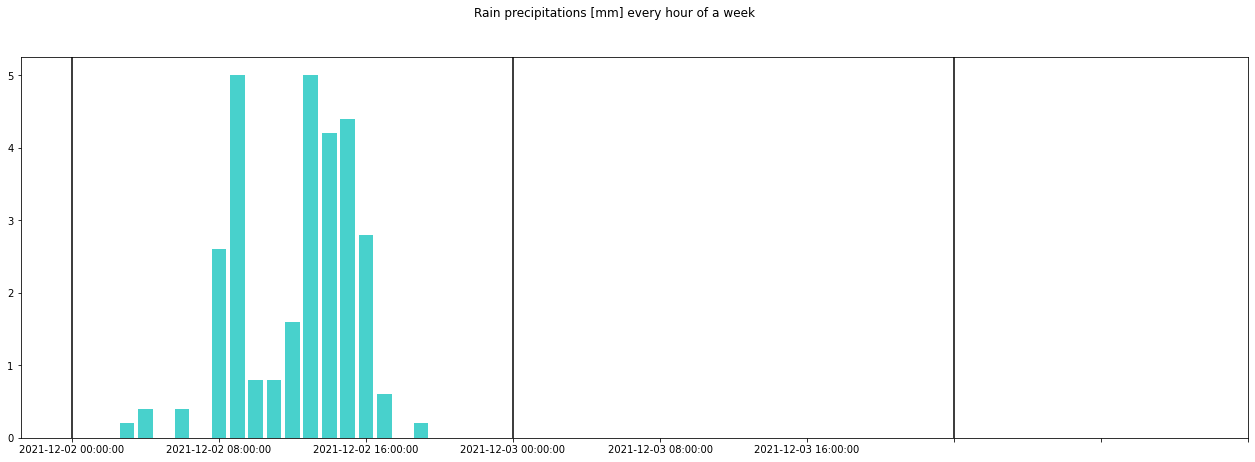

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

rain_temp = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/pluvi.csv')
rain_temp=rain_temp.set_index('Date')
rain_temp=rain_temp.loc['2021-11-29':'2021-12-06']
rain_temp.reset_index(level=0, inplace=True)
#ogni ora somma 4 valori (ogni 15 minuti)
num_values=4
how_many=int(len(rain_temp)/num_values)
rain_df=pd.DataFrame(columns=rain_temp.columns)
for i in range(how_many):
  value=0
  for j in range(num_values):
    value=value+rain_temp['Precipitazione [mm]'][i*num_values+j]
  rain_df.loc[i,:]=[rain_temp['Date'][i*num_values],value]
#cambia formato delle date
for i in range(len(rain_df)):
  rain_df['Date'][i]=datetime.datetime.strptime(rain_df['Date'][i], "%Y-%m-%d %H:%M").strftime('%Y-%m-%d %H:%M:%S')
rain_df=rain_df.set_index('Date')
display(rain_df)

# Plot
data_rain=rain_df['Precipitazione [mm]']
plt.figure(figsize=(22, 7))
plt.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 168, 20)
plt.xticks(x_ticks)
x_line = np.arange(0, 168, 24)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a day', color='black')
plt.suptitle('Rain precipitations [mm] every hour of a week')
plt.show()

plt.tight_layout();



Values every 6 hours for a month

,Precipitazione [mm]
Date,
2021-11-01 01:00:00,2
2021-11-01 07:00:00,0.2
2021-11-01 13:00:00,8.6
2021-11-01 19:00:00,7
2021-11-02 01:00:00,0.2
...,...
2021-11-29 19:00:00,0
2021-11-30 01:00:00,0
2021-11-30 07:00:00,0


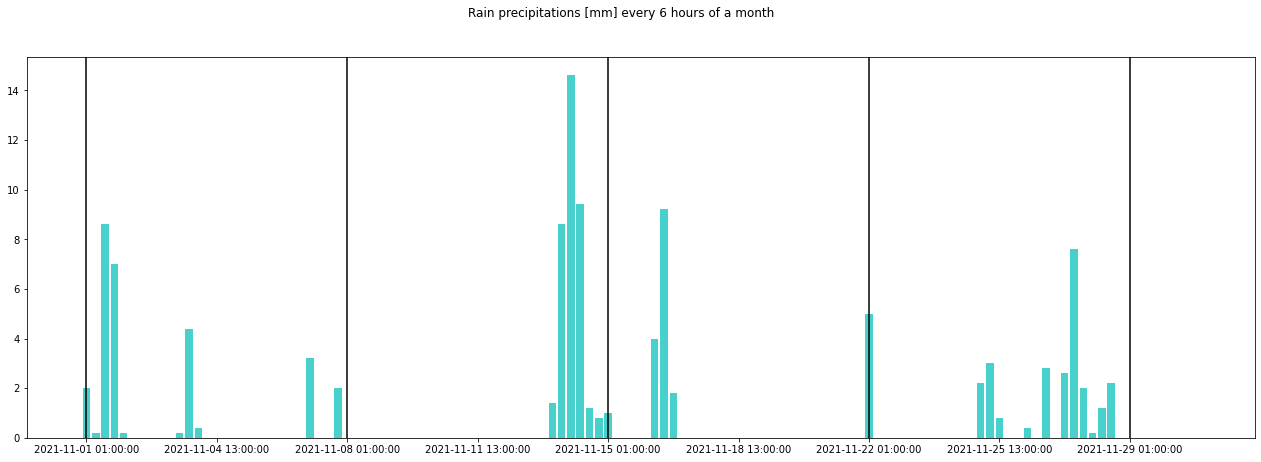

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

rain_temp = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/pluvi.csv')
rain_temp=rain_temp.set_index('Date')
rain_temp=rain_temp.loc['2021-11-01 01:00':'2021-12-01 01:00']
rain_temp.reset_index(level=0, inplace=True)
#ogni 6 ore somma: 24 valori (ogni 15 minuti)
num_values=24
how_many=int(len(rain_temp)/num_values)
rain_df_month=pd.DataFrame(columns=rain_temp.columns)
for i in range(how_many):
  value=0
  for j in range(num_values):
    value=value+rain_temp['Precipitazione [mm]'][i*num_values+j]
  rain_df_month.loc[i,:]=[rain_temp['Date'][i*num_values],value]
#valori dell'11 mancano
line = pd.DataFrame({"Date": ['2021-11-11 01:00','2021-11-11 07:00', '2021-11-11 13:00', '2021-11-11 19:00'], "Precipitazione [mm]": [0,0,0,0]})
rain_df_month = pd.concat([rain_df_month.iloc[:40], line, rain_df_month.iloc[40:]]).reset_index(drop=True)
#cambia formato delle date
for i in range(len(rain_df_month)):
  rain_df_month['Date'][i]=datetime.datetime.strptime(rain_df_month['Date'][i], "%Y-%m-%d %H:%M").strftime('%Y-%m-%d %H:%M:%S')
rain_df_month=rain_df_month.set_index('Date')
display(rain_df_month)

# Plot
data_rain_month=rain_df_month['Precipitazione [mm]']
plt.figure(figsize=(22, 7))
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 116, 14)
x_line = np.arange(0, 116, 28)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a week', color='black')
plt.xticks(x_ticks)
plt.suptitle('Rain precipitations [mm] every 6 hours of a month')
plt.show()

plt.tight_layout();

# Wind

Values every hour for a week

,Velocità [m/s]
Date,
2021-11-29 00:00:00,1.1
2021-11-29 01:00:00,1.05
2021-11-29 02:00:00,1.175
2021-11-29 03:00:00,2.1
2021-11-29 04:00:00,0.95
...,...
2021-12-05 19:00:00,1.65
2021-12-05 20:00:00,1.3
2021-12-05 21:00:00,2.025


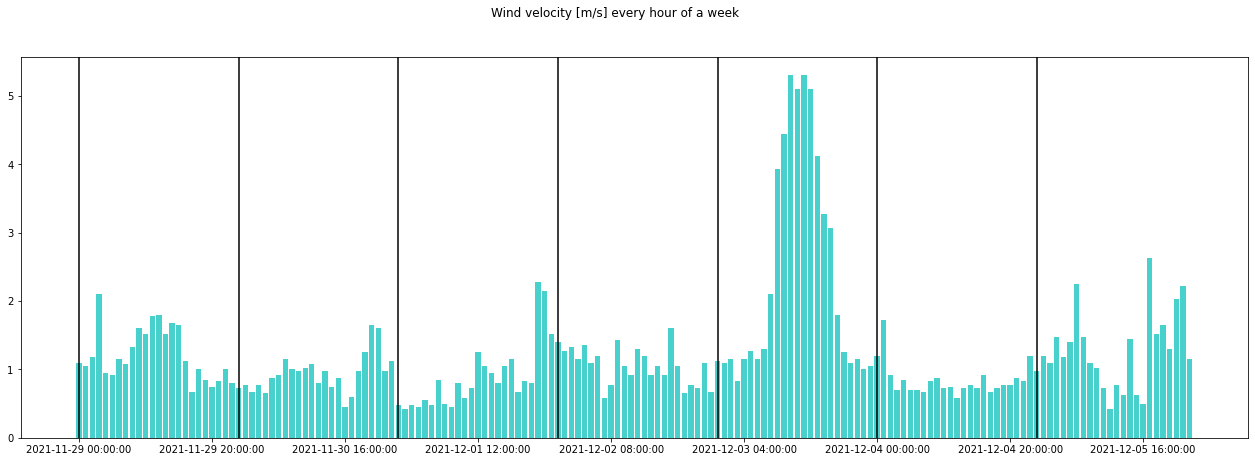

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

wind_temp = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/anemo.csv')
wind_temp=wind_temp.set_index('Date')
wind_temp=wind_temp.loc['2021-11-29':'2021-12-06']
wind_temp.reset_index(level=0, inplace=True)
wind_temp=wind_temp.drop([' Potenza'], axis=1)
#ogni ora fa la media di 4 valori (ogni 15 minuti)
num_values=4
how_many=int(len(wind_temp)/num_values)
wind_df=pd.DataFrame(columns=wind_temp.columns)
for i in range(how_many):
  value=0
  for j in range(num_values):
    value=value+wind_temp[' Velocità [m/s]'][i*num_values+j]
  value=value/num_values
  wind_df.loc[i,:]=[wind_temp['Date'][i*num_values],value]
#cambia formato delle date
for i in range(len(wind_df)):
  wind_df['Date'][i]=datetime.datetime.strptime(wind_df['Date'][i], "%Y-%m-%d %H:%M").strftime('%Y-%m-%d %H:%M:%S')
wind_df=wind_df.set_index('Date')
display(wind_df)

# Plot
data_wind=wind_df[' Velocità [m/s]']
plt.figure(figsize=(22, 7))
plt.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 168, 20)
plt.xticks(x_ticks)
x_line = np.arange(0, 168, 24)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a day', color='black')
plt.suptitle('Wind velocity [m/s] every hour of a week')
plt.show()

plt.tight_layout();



Values every 6 hours for a month

,Velocità [m/s]
Date,
2021-10-01 02:00:00,0.295833
2021-10-01 08:00:00,0.5375
2021-10-01 14:00:00,0.320833
2021-10-01 20:00:00,0.0125
2021-10-02 02:00:00,0.00416667
...,...
2021-10-30 14:00:00,0
2021-10-30 20:00:00,0.0166667
2021-10-31 02:00:00,0


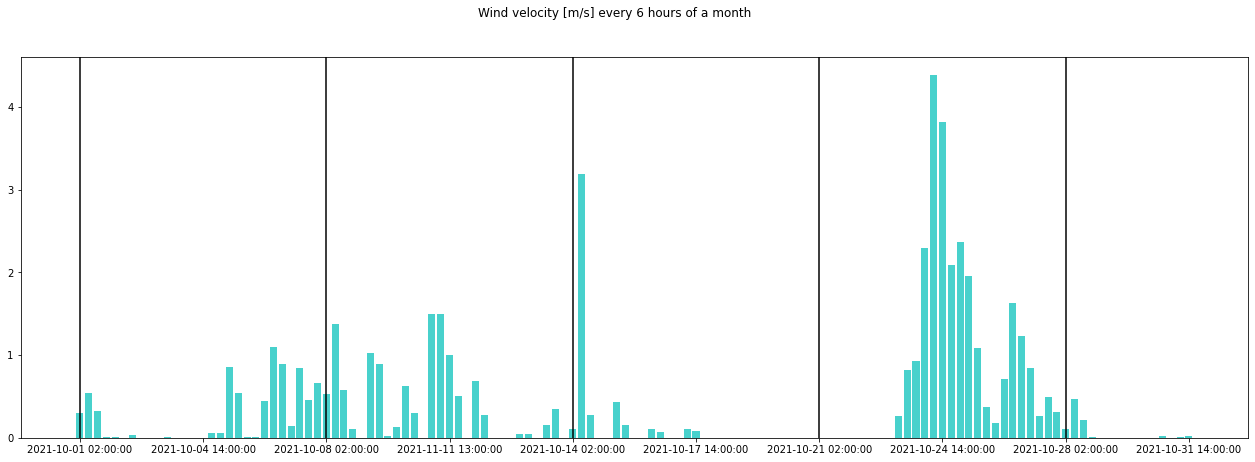

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

wind_temp = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/anemo.csv')
wind_temp=wind_temp.set_index('Date')
wind_temp=wind_temp.loc['2021-11-01 01:00':'2021-12-01 01:00']
wind_temp.reset_index(level=0, inplace=True)
wind_temp=wind_temp.drop([' Potenza'], axis=1)
#ogni 6 ore somma: 24 valori (ogni 15 minuti)
num_values=24
how_many=int(len(wind_temp)/num_values)
wind_df_month=pd.DataFrame(columns=wind_temp.columns)
for i in range(how_many):
  value=0
  for j in range(num_values):
    value=value+wind_temp[' Velocità [m/s]'][i*num_values+j]
  value=value/num_values
  wind_df_month.loc[i,:]=[wind_temp['Date'][i*num_values],value]
#valori dell'11 mancano
line = pd.DataFrame({"Date": ['2021-11-11 01:00','2021-11-11 07:00', '2021-11-11 13:00', '2021-11-11 19:00'], " Velocità [m/s]": [1.5,1.5,1,0.5]})
wind_df_month = pd.concat([wind_df_month.iloc[:40], line, wind_df_month.iloc[40:]]).reset_index(drop=True)
#cambia formato delle date
for i in range(len(wind_df_month)):
  wind_df_month['Date'][i]=datetime.datetime.strptime(wind_df_month['Date'][i], "%Y-%m-%d %H:%M").strftime('%Y-%m-%d %H:%M:%S')
wind_df_month=wind_df_month.set_index('Date')
display(wind_df_month)

# Plot
data_wind_month=wind_df_month[' Velocità [m/s]']
plt.figure(figsize=(22, 7))
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 128, 14)
x_line = np.arange(0, 128, 28)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a week', color='black')
plt.xticks(x_ticks)
plt.suptitle('Wind velocity [m/s] every 6 hours of a month')
plt.show()

plt.tight_layout();

# Temperatures

1 week:

In [ ]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pytz
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", 
 avg(c."Temp. int.") as "Temp. int.",  avg(c."T") as "T"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-28 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-05 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('Temp. int.'::varchar), ('T'::varchar)$$
) AS value ("Dates" timestamp, "Temp. int." float, "T" float))  c 
group by bucket
order by bucket asc;
 """
df_temp = pd.read_sql(query, conn)
df_temp= df_temp.rename(columns={'bucket': 'Dates'})
df_temp=df_temp.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_temp.index = df_temp.index.tz_localize(pytz.utc).tz_convert(europe)
#fix temp int
df_temp['Temp. int.'] = df_temp['Temp. int.'].div(100)
df_temp['T'] = df_temp['T'].div(10)
df_temp=df_temp.dropna()

display(df_temp)


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,Temp. int.,T
Dates,,
2021-11-29 00:00:00+01:00,14.224250,2.360000
2021-11-29 01:00:00+01:00,14.150500,1.985000
2021-11-29 02:00:00+01:00,13.831143,2.182857
2021-11-29 03:00:00+01:00,14.686923,2.887179
2021-11-29 04:00:00+01:00,14.591250,2.657500
...,...,...
2021-12-05 19:00:00+01:00,18.378750,6.607500
2021-12-05 20:00:00+01:00,17.455000,5.227500
2021-12-05 21:00:00+01:00,15.995641,3.889744


In [ ]:
df_temp_index=df_temp.index
temp_index=[]
for i in range(len(df_temp_index)):
  if(i%24==0):
    temp_index.append(df_temp_index[i])

Rain

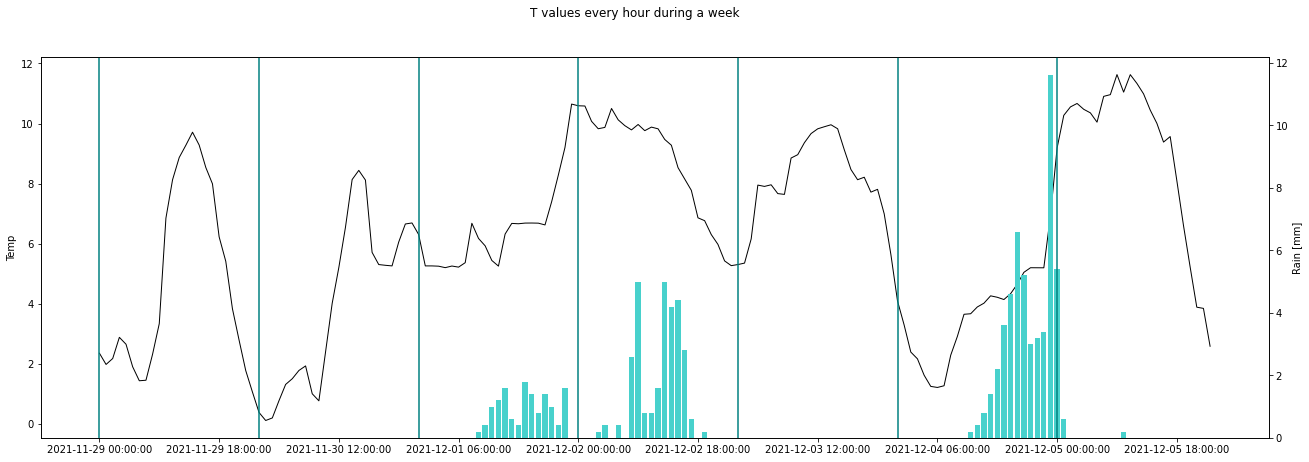

In [ ]:
data_T = df_temp['T']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_T.index.strftime('%Y-%m-%d %H:%M:%S'),data_T, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(temp_index)):
  plt.axvline(temp_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_T), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('T values every hour during a week')
plt.show()

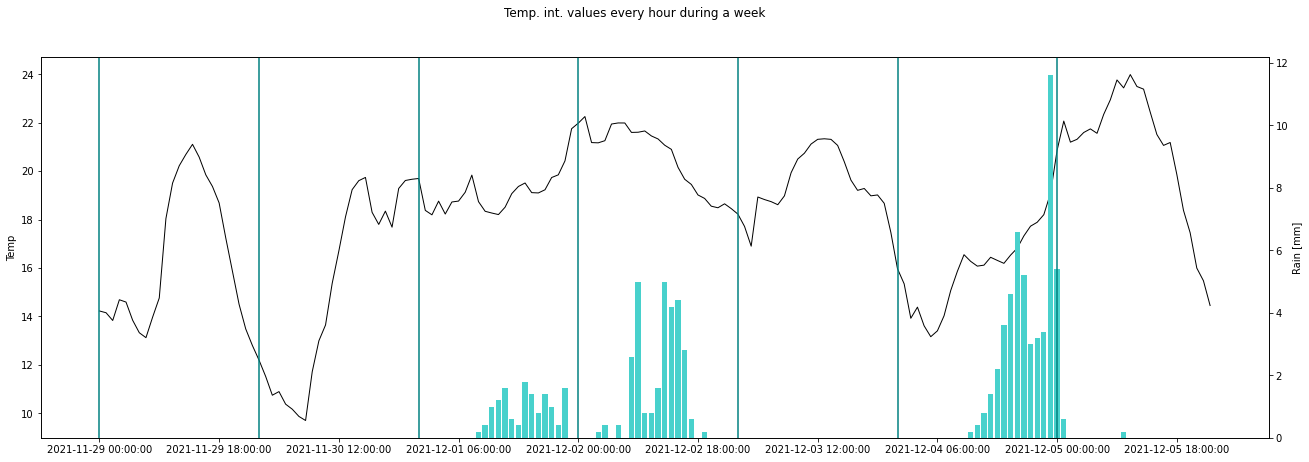

In [ ]:
data_Temp_int = df_temp['Temp. int.']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_Temp_int.index.strftime('%Y-%m-%d %H:%M:%S'),data_Temp_int, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(temp_index)):
  plt.axvline(temp_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_T), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('Temp. int. values every hour during a week')
plt.show()

Wind

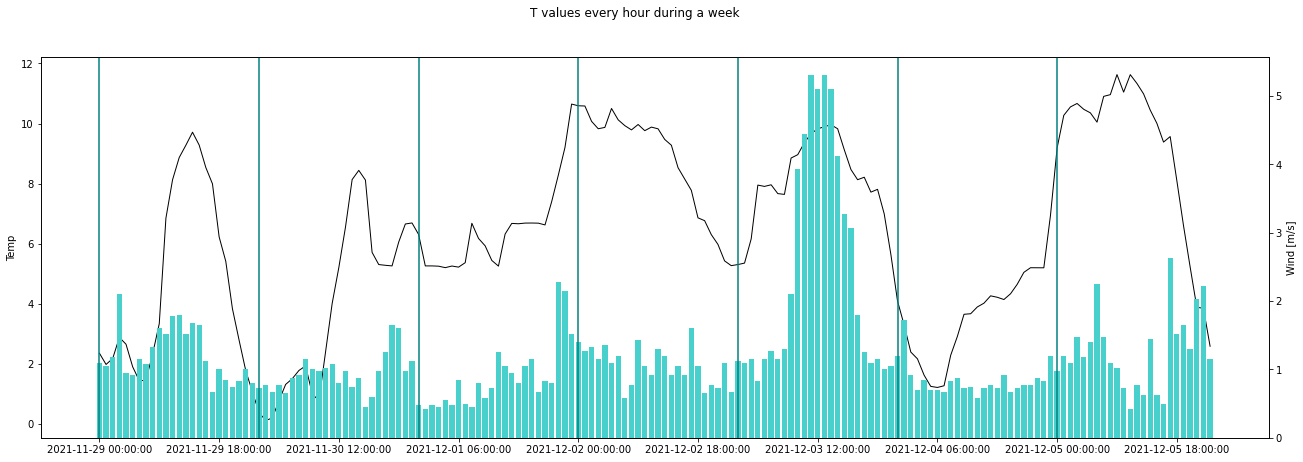

In [ ]:
data_T = df_temp['T']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_T.index.strftime('%Y-%m-%d %H:%M:%S'),data_T, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(temp_index)):
  plt.axvline(temp_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_T), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('T values every hour during a week')
plt.show()

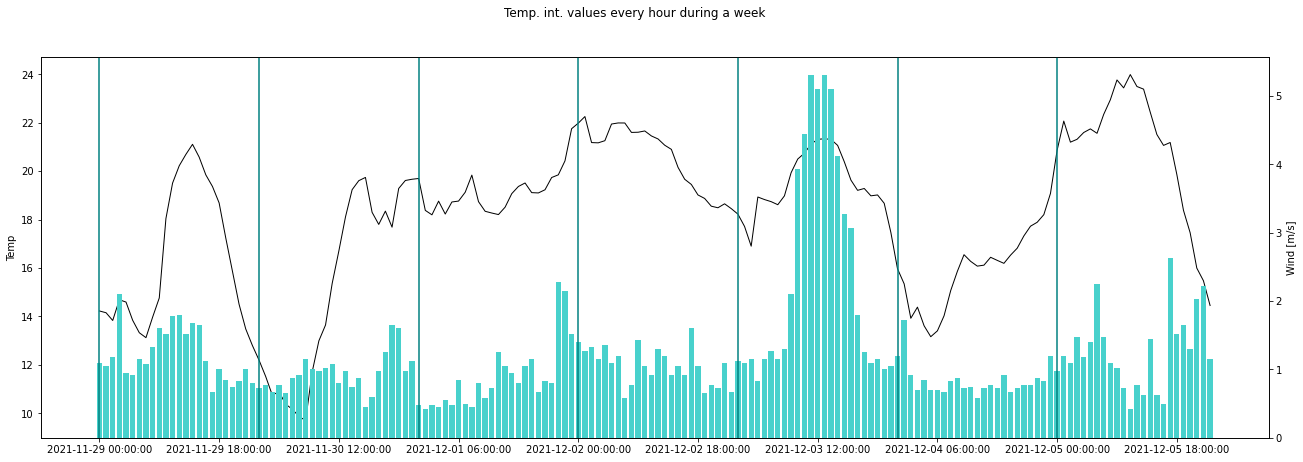

In [ ]:
data_Temp_int = df_temp['Temp. int.']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_Temp_int.index.strftime('%Y-%m-%d %H:%M:%S'),data_Temp_int, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(temp_index)):
  plt.axvline(temp_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_T), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('Temp. int. values every hour during a week')
plt.show()

Month

In [ ]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pytz
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('6 hour', c."Dates" ) as "bucket", 
 avg(c."Temp. int.") as "Temp. int.",  avg(c."T") as "T"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('Temp. int.'::varchar), ('T'::varchar)$$
) AS value ("Dates" timestamp, "Temp. int." float, "T" float))  c 
group by bucket
order by bucket asc;
 """
df_temp_month = pd.read_sql(query, conn)
df_temp_month= df_temp_month.rename(columns={'bucket': 'Dates'})
df_temp_month=df_temp_month.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_temp_month = df_temp_month.tz_localize(pytz.utc).tz_convert(europe)
#fix temp 
df_temp_month['Temp. int.'] = df_temp_month['Temp. int.'].div(100)
df_temp_month['T'] = df_temp_month['T'].div(10)
display(df_temp_month)


,Temp. int.,T
Dates,,
2021-11-01 01:00:00+01:00,26.526017,14.200000
2021-11-01 07:00:00+01:00,25.941631,13.718455
2021-11-01 13:00:00+01:00,26.772585,14.772458
2021-11-01 19:00:00+01:00,26.915551,14.761864
2021-11-02 01:00:00+01:00,26.399134,14.352814
...,...,...
2021-11-29 19:00:00+01:00,14.341983,2.542194
2021-11-30 01:00:00+01:00,10.588210,0.975983
2021-11-30 07:00:00+01:00,13.336211,2.509692


In [ ]:
df_temp_month_index=df_temp_month.index
tempmonth_index=[]
for i in range(len(df_temp_month_index)):
  if(i%28==0):
    tempmonth_index.append(df_temp_month_index[i])

Rain

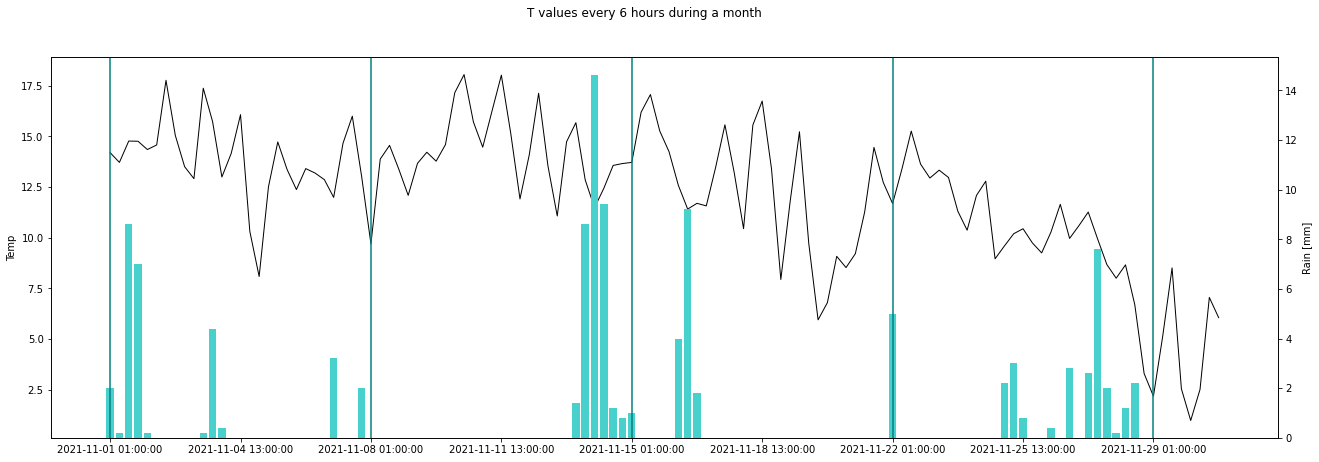

In [ ]:
data_T = df_temp_month['T']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_temp_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_T, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
for i in range(len(tempmonth_index)):
  plt.axvline(tempmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('T values every 6 hours during a month')
plt.show()

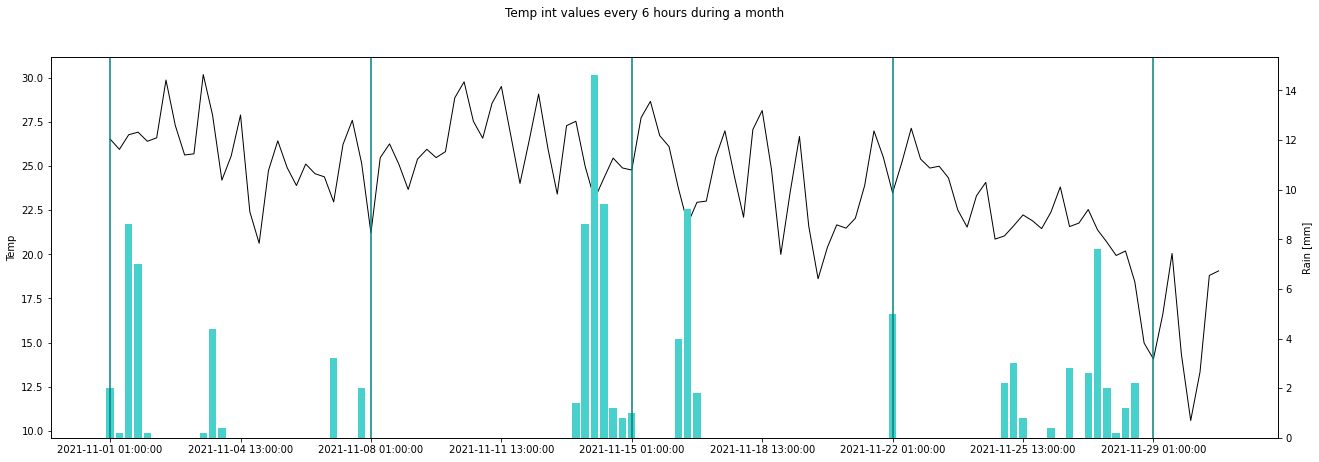

In [ ]:
data_Temp = df_temp_month['Temp. int.']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax1.plot(df_temp_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_Temp, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(tempmonth_index)):
  plt.axvline(tempmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('Temp int values every 6 hours during a month')
plt.show()

Wind

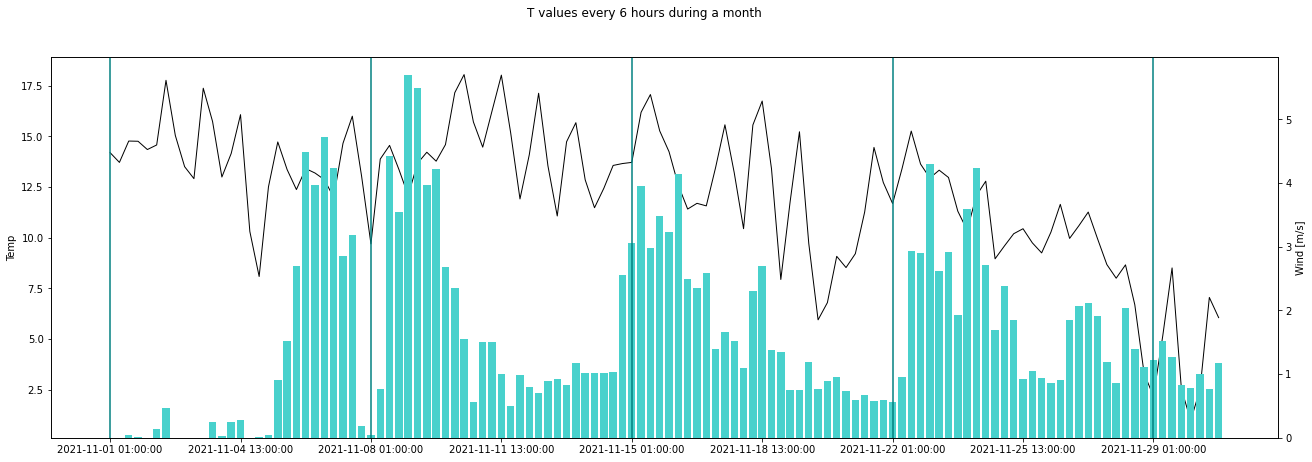

In [ ]:
data_T = df_temp_month['T']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
ax1.plot(df_temp_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_T, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
for i in range(len(tempmonth_index)):
  plt.axvline(tempmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('T values every 6 hours during a month')
plt.show()

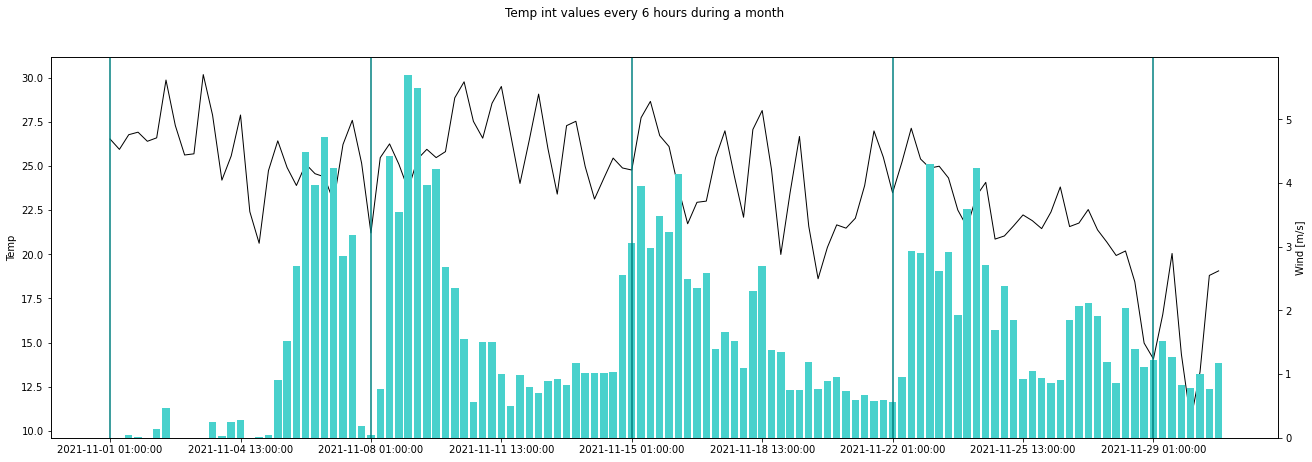

In [ ]:
data_Temp = df_temp_month['Temp. int.']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_temp_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_Temp, color='black', linewidth=1)
ax1.set_ylabel('Temp', color='black')
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(tempmonth_index)):
  plt.axvline(tempmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('Temp int values every 6 hours during a month')
plt.show()

# Gasses

1 week:

In [ ]:
import pandas as pd
import psycopg2
import pytz
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", 
 avg(c."O3") as "O3" , avg(c."CO2") as "CO2", avg(c."NO2") as "NO2", avg(c."CO") as "CO"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-28 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-05 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('CO2'::varchar), ('NO2'::varchar), ('CO'::varchar)$$
) AS value ("Dates" timestamp, "O3" float,"CO2" float, "NO2" float, "CO" float))  c 
group by bucket
order by bucket asc;
 """
df_gas = pd.read_sql(query, conn)
df_gas= df_gas.rename(columns={'bucket': 'Dates'})
df_gas=df_gas.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_gas.index = df_gas.index.tz_localize(pytz.utc).tz_convert(europe)
#fix temp int
display(df_gas)


,O3,CO2,NO2,CO
Dates,,,,
2021-11-29 00:00:00+01:00,270.000000,437.125000,183.175000,206.125000
2021-11-29 01:00:00+01:00,356.425000,441.425000,212.000000,205.325000
2021-11-29 02:00:00+01:00,304.457143,425.342857,112.742857,196.142857
2021-11-29 03:00:00+01:00,194.128205,417.435897,39.512821,188.769231
2021-11-29 04:00:00+01:00,154.475000,426.300000,100.025000,193.325000
...,...,...,...,...
2021-12-05 19:00:00+01:00,153.575000,431.675000,83.325000,192.650000
2021-12-05 20:00:00+01:00,169.725000,432.375000,118.625000,198.125000
2021-12-05 21:00:00+01:00,438.256410,468.538462,245.871795,210.461538


In [ ]:
df_gas_index=df_gas.index
gas_index=[]
for i in range(len(df_gas_index)):
  if(i%24==0):
    gas_index.append(df_gas_index[i])
print(gas_index)

[Timestamp('2021-11-29 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-11-30 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-01 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-02 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-03 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-04 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-05 00:00:00+0100', tz='Europe/Rome')]


Rain

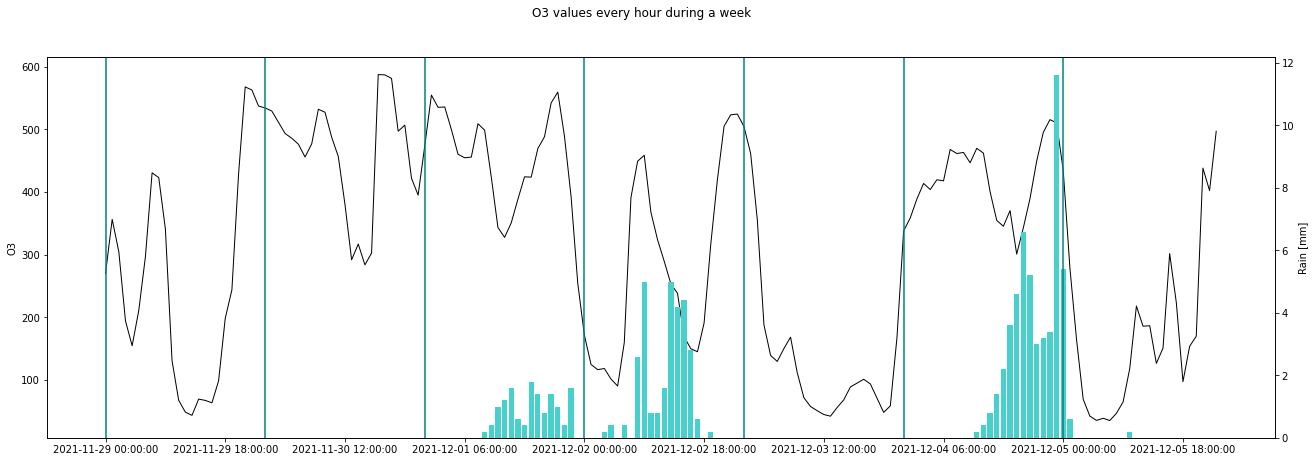

In [ ]:
data_O3 = df_gas['O3']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_O3.index.strftime('%Y-%m-%d %H:%M:%S'),data_O3, color='black', linewidth=1)
ax1.set_ylabel('O3', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_O3), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('O3 values every hour during a week')
plt.show()

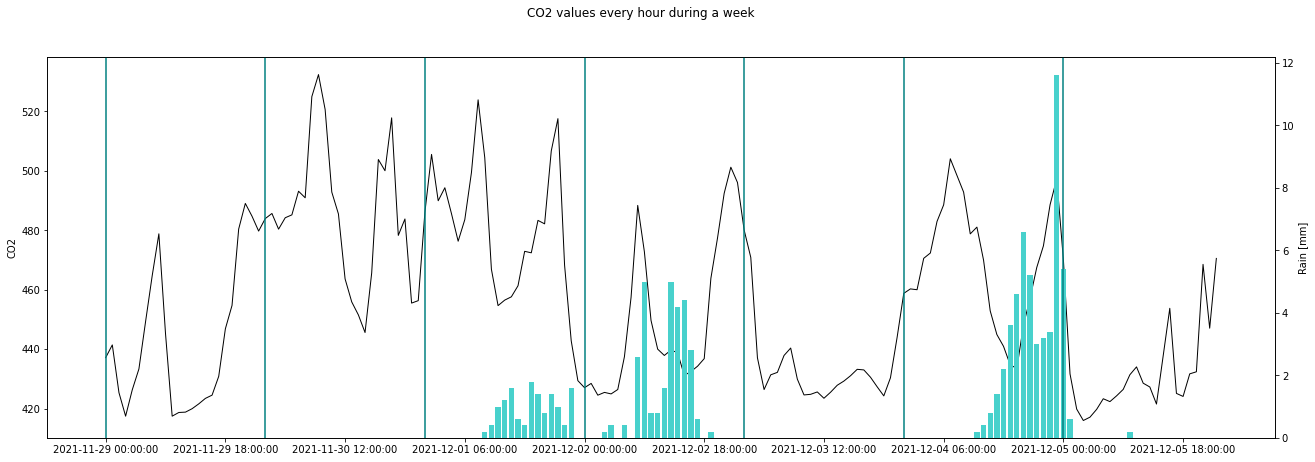

In [ ]:
data_CO2 = df_gas['CO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_CO2.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO2, color='black', linewidth=1)
ax1.set_ylabel('CO2', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_CO2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO2 values every hour during a week')
plt.show()

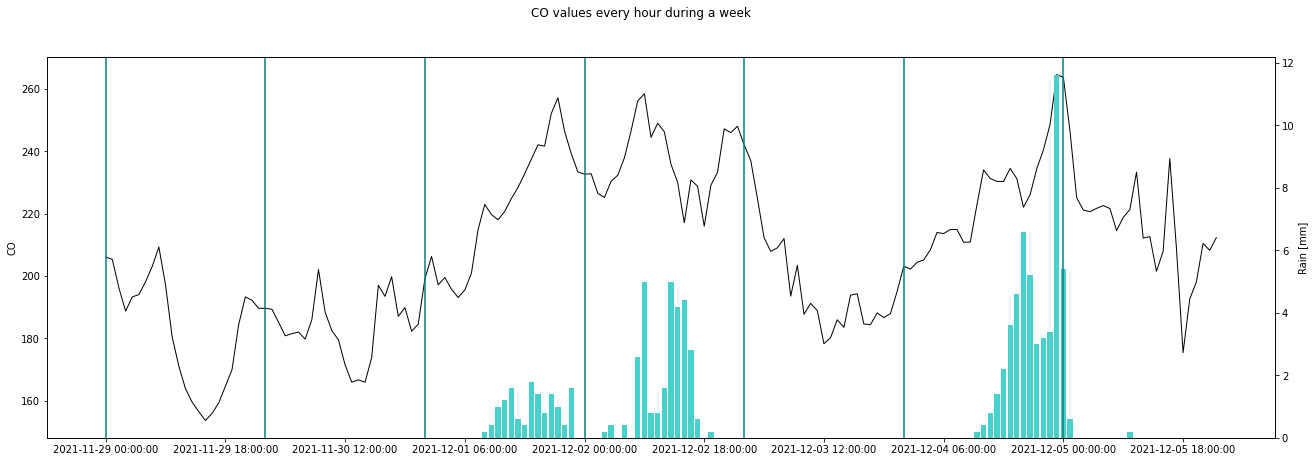

In [ ]:
data_CO = df_gas['CO']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_CO.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO, color='black', linewidth=1)
ax1.set_ylabel('CO', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_CO), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO values every hour during a week')
plt.show()

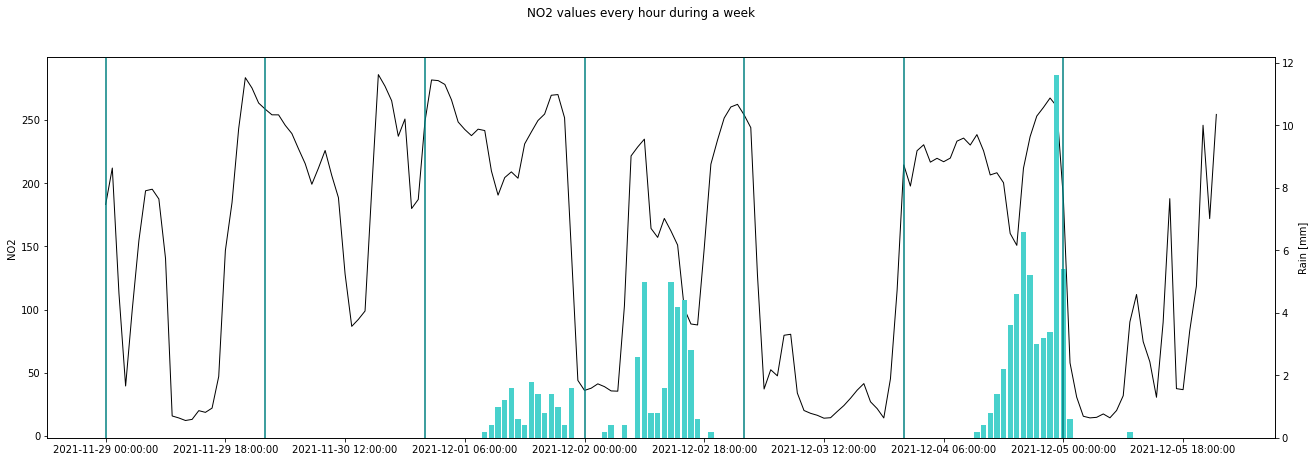

In [ ]:
data_NO2 = df_gas['NO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_NO2.index.strftime('%Y-%m-%d %H:%M:%S'),data_NO2, color='black', linewidth=1)
ax1.set_ylabel('NO2', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_NO2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('NO2 values every hour during a week')
plt.show()

Wind

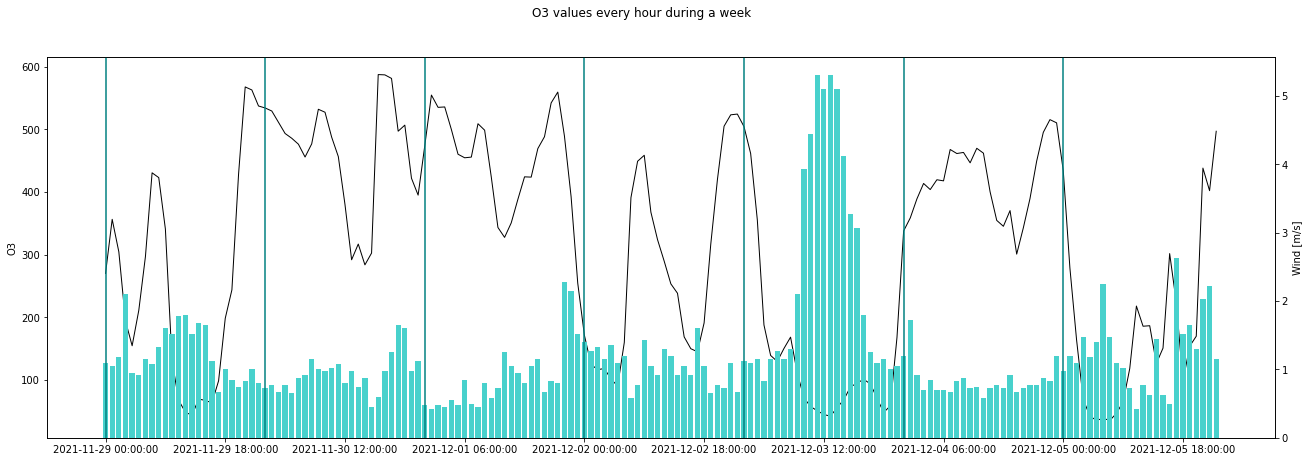

In [ ]:
data_O3 = df_gas['O3']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_O3.index.strftime('%Y-%m-%d %H:%M:%S'),data_O3, color='black', linewidth=1)
ax1.set_ylabel('O3', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_O3), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('O3 values every hour during a week')
plt.show()

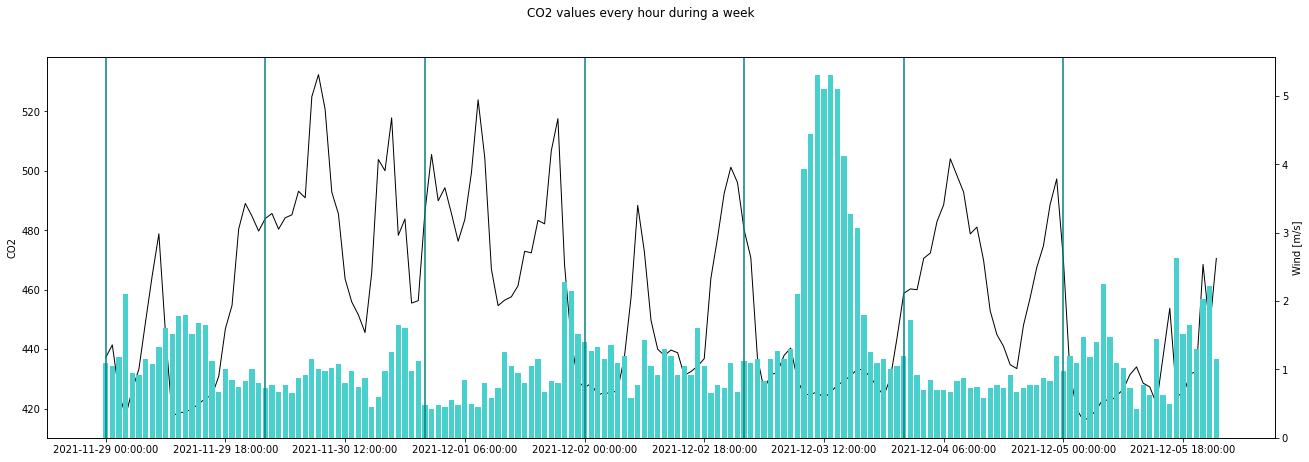

In [ ]:
data_CO2 = df_gas['CO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_CO2.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO2, color='black', linewidth=1)
ax1.set_ylabel('CO2', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_CO2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO2 values every hour during a week')
plt.show()

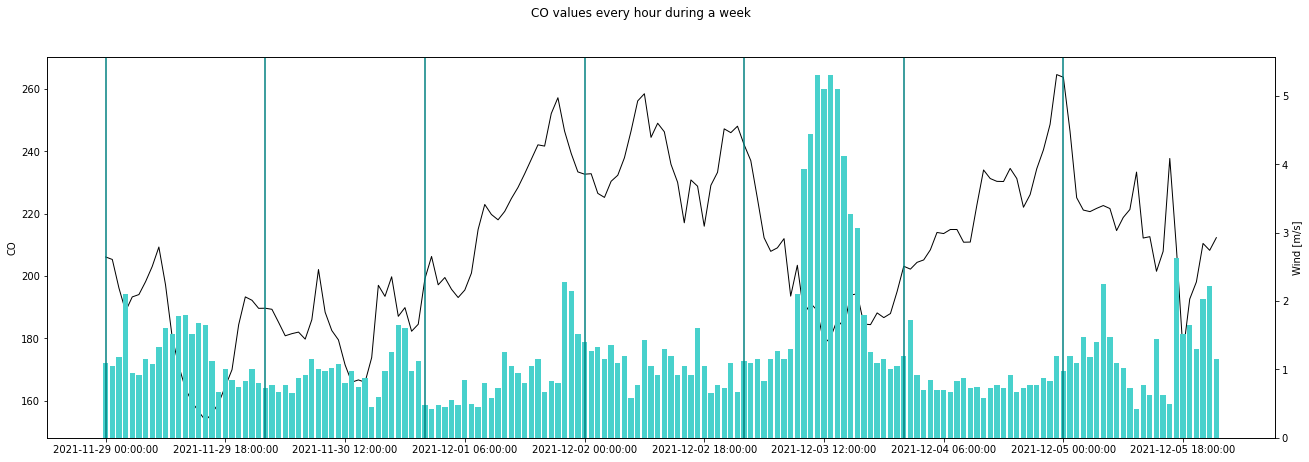

In [ ]:
data_CO = df_gas['CO']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_CO.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO, color='black', linewidth=1)
ax1.set_ylabel('CO', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_CO), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO values every hour during a week')
plt.show()

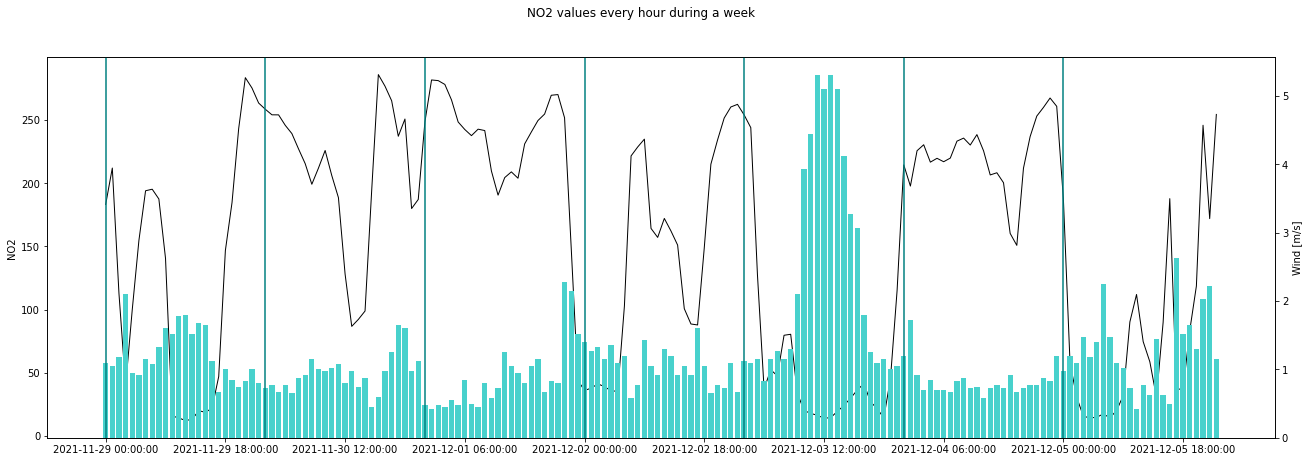

In [ ]:
data_NO2 = df_gas['NO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(data_NO2.index.strftime('%Y-%m-%d %H:%M:%S'),data_NO2, color='black', linewidth=1)
ax1.set_ylabel('NO2', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(gas_index)):
  plt.axvline(gas_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_NO2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('NO2 values every hour during a week')
plt.show()

1 month:

In [ ]:
import pandas as pd
import psycopg2
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('6 hour', c."Dates" ) as "bucket", 
 avg(c."O3") as "O3" , avg(c."CO2") as "CO2", avg(c."NO2") as "NO2", avg(c."CO") as "CO"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('CO2'::varchar), ('NO2'::varchar), ('CO'::varchar)$$
) AS value ("Dates" timestamp, "O3" float,"CO2" float, "NO2" float, "CO" float))  c 
group by bucket
order by bucket asc;
 """
df_gas_month = pd.read_sql(query, conn)
df_gas_month= df_gas_month.rename(columns={'bucket': 'Dates'})
df_gas_month=df_gas_month.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_gas_month.index = df_gas_month.index.tz_localize(pytz.utc).tz_convert(europe)
#fix temp int
display(df_gas_month)


,O3,CO2,NO2,CO
Dates,,,,
2021-10-01 02:00:00+02:00,109.536697,406.844037,27.064220,203.362385
2021-10-01 08:00:00+02:00,150.916300,407.471366,39.325991,201.004405
2021-10-01 14:00:00+02:00,256.224576,410.754237,44.559322,191.572034
2021-10-01 20:00:00+02:00,278.798077,415.653846,87.634615,215.442308
2021-10-02 02:00:00+02:00,313.377551,440.494898,177.673469,216.938776
...,...,...,...,...
2021-10-31 02:00:00+02:00,504.048035,470.318777,262.973799,225.244541
2021-10-31 07:00:00+01:00,368.034188,454.038462,171.632479,208.602564
2021-10-31 13:00:00+01:00,161.367089,425.767932,34.354430,203.704641


In [ ]:
df_gas_month_index=df_gas_month.index
gasmonth_index=[]
for i in range(len(df_gas_month_index)):
  if(i%28==0):
    gasmonth_index.append(df_gas_month_index[i])
print(gasmonth_index)

[Timestamp('2021-10-01 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-08 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-15 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-22 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-29 02:00:00+0200', tz='Europe/Rome')]


Rain

In [ ]:
data_O3 = df_gas_month['O3']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_O3, color='black', linewidth=1)
ax1.set_ylabel('O3', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_O3), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('O3 values every 6 hours during a month')
plt.show()

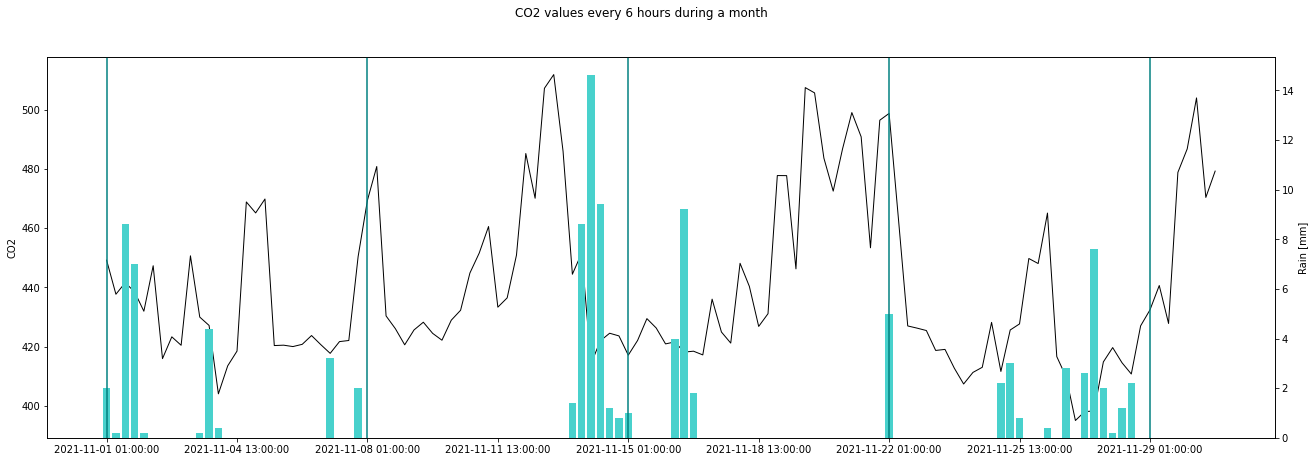

In [ ]:
data_CO2 = df_gas_month['CO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO2, color='black', linewidth=1)
ax1.set_ylabel('CO2', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_CO2), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO2 values every 6 hours during a month')
plt.show()

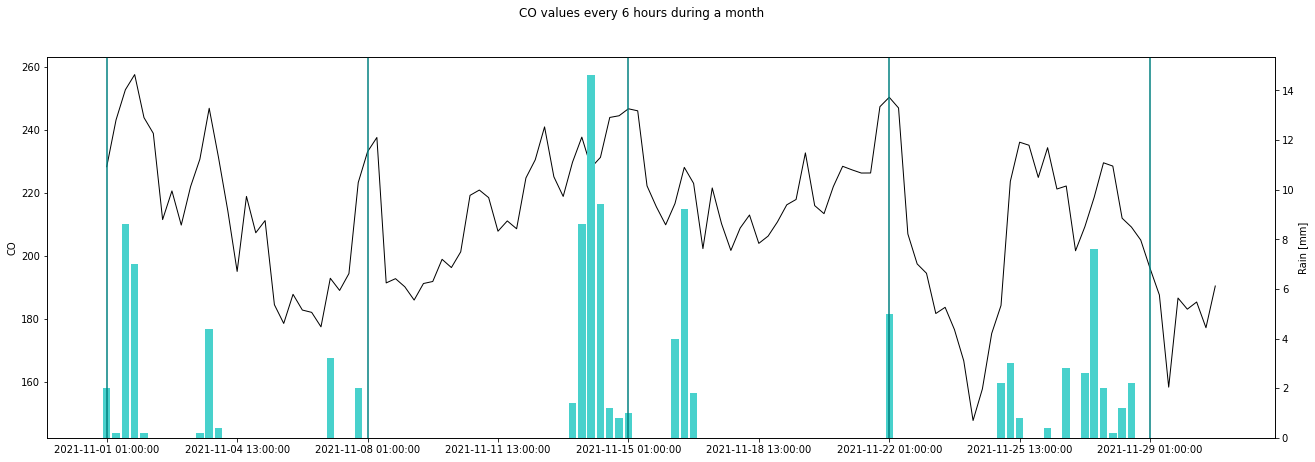

In [ ]:
data_CO = df_gas_month['CO']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO, color='black', linewidth=1)
ax1.set_ylabel('CO', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_CO), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO values every 6 hours during a month')
plt.show()

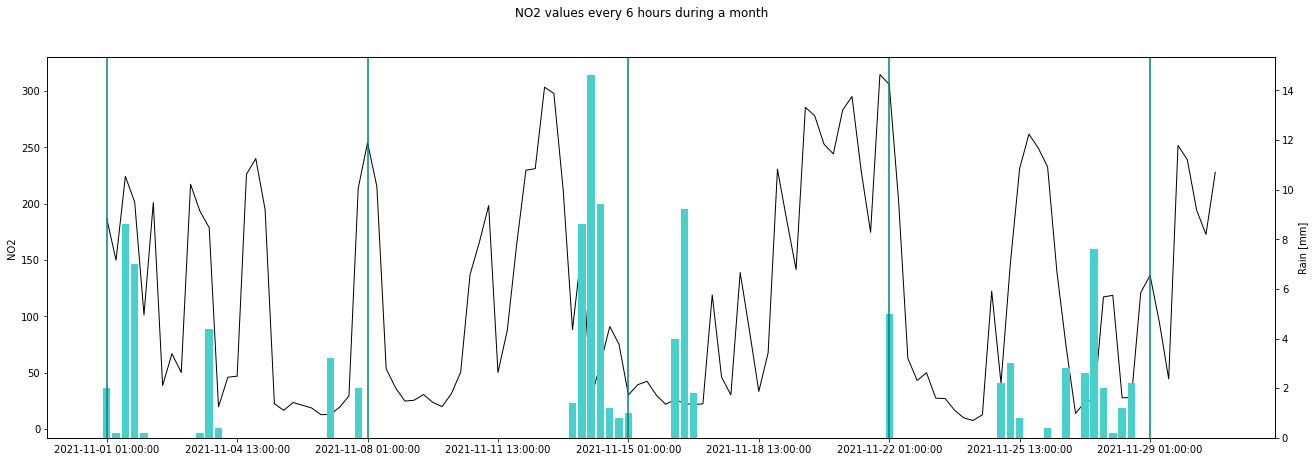

In [ ]:
data_NO2 = df_gas_month['NO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_NO2, color='black', linewidth=1)
ax1.set_ylabel('NO2', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_NO2), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('NO2 values every 6 hours during a month')
plt.show()

Wind

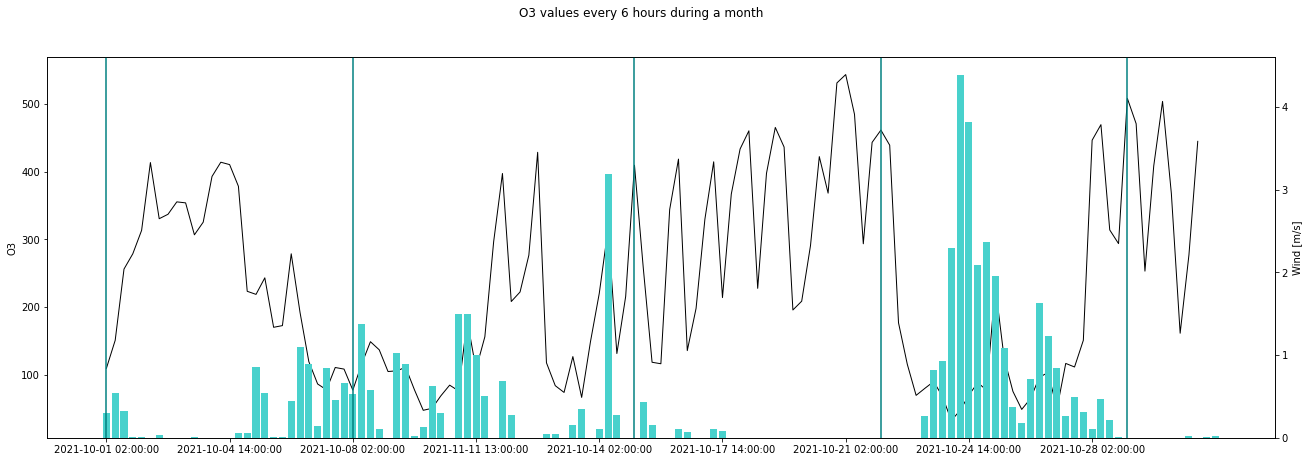

In [ ]:
data_O3 = df_gas_month['O3']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_O3, color='black', linewidth=1)
ax1.set_ylabel('O3', color='black')
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_O3), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('O3 values every 6 hours during a month')
plt.show()

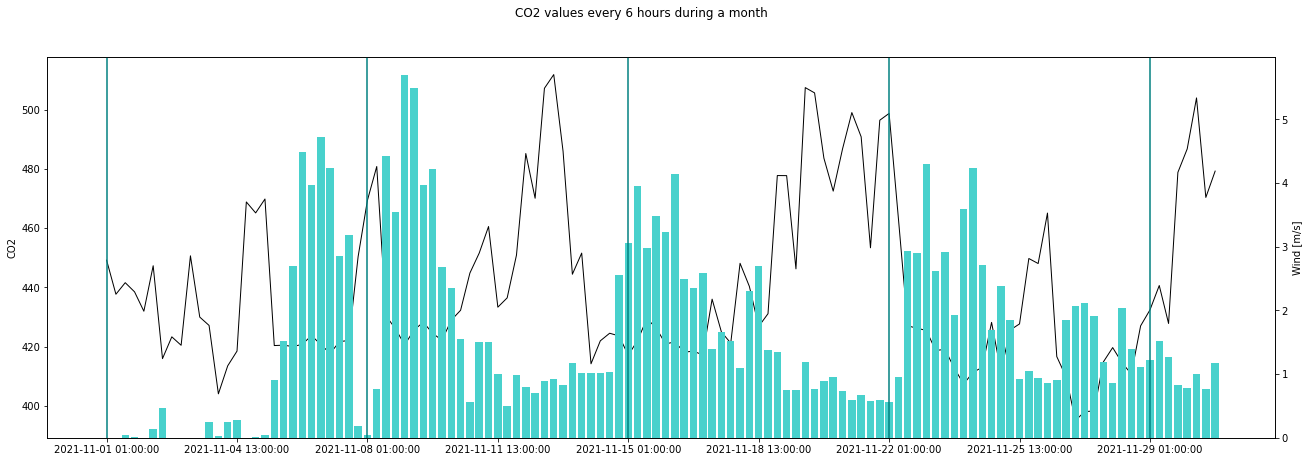

In [ ]:
data_CO2 = df_gas_month['CO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO2, color='black', linewidth=1)
ax1.set_ylabel('CO2', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_CO2), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO2 values every 6 hours during a month')
plt.show()

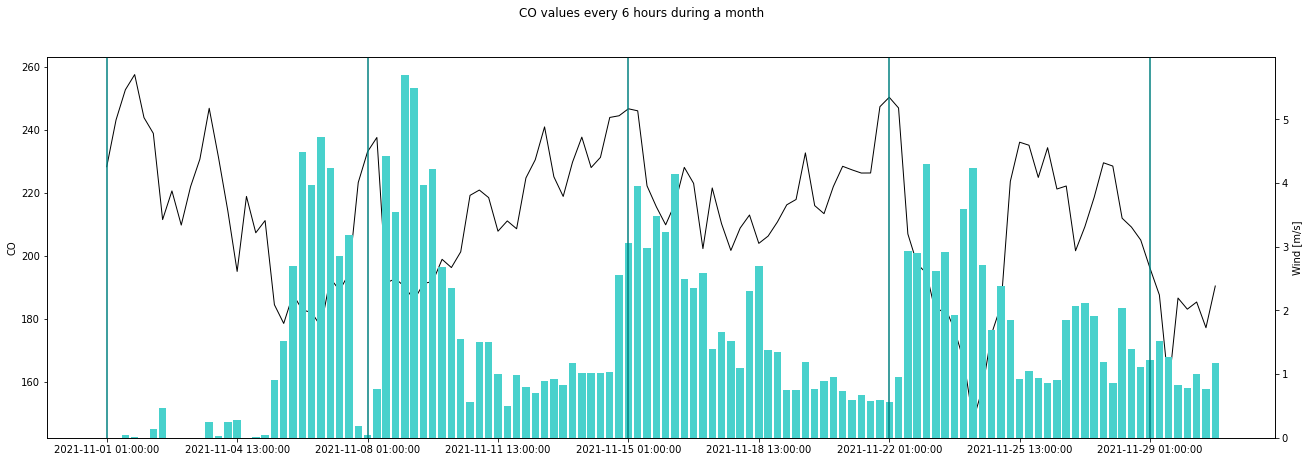

In [ ]:
data_CO = df_gas_month['CO']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_CO, color='black', linewidth=1)
ax1.set_ylabel('CO', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_CO), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('CO values every 6 hours during a month')
plt.show()

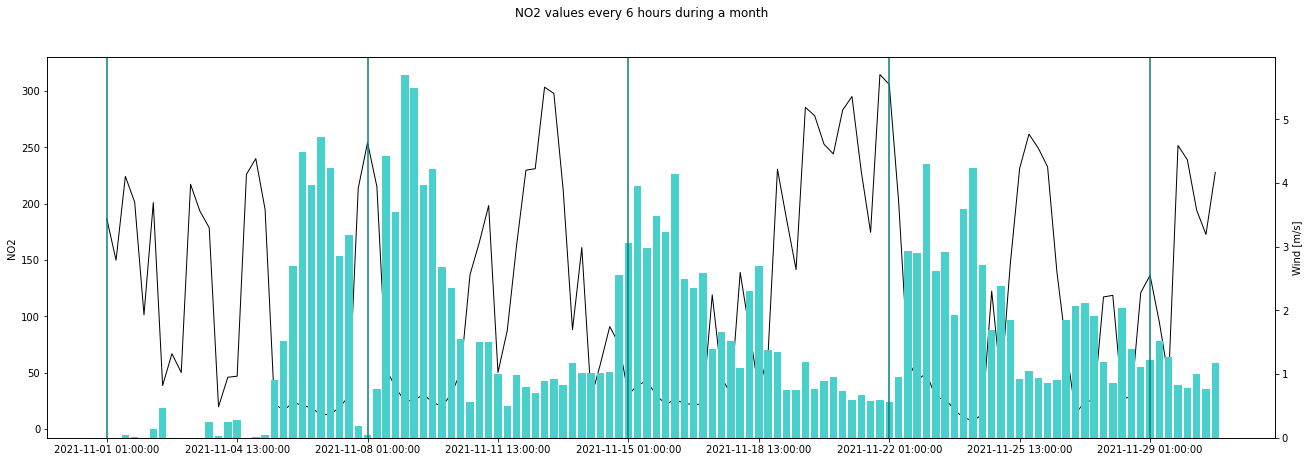

In [ ]:
data_NO2 = df_gas_month['NO2']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
ax1.plot(df_gas_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_NO2, color='black', linewidth=1)
ax1.set_ylabel('NO2', color='black')
for i in range(len(gasmonth_index)):
  plt.axvline(gasmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_NO2), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('NO2 values every 6 hours during a month')
plt.show()

# Air particles

1 week:

In [ ]:
import pandas as pd
import psycopg2
import pytz
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", 
  avg(c."PM2.5") as "PM2.5" , avg(c."PM10") as "PM10", avg(c."RH") as "RH", avg(c."VOC") as "VOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-28 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-05 23:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('PM2.5'::varchar), ('PM10'::varchar), ('RH'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "PM2.5" float,"PM10" float, "RH" float, "VOC" float))  c 
group by bucket
order by bucket asc;
 """
df_par = pd.read_sql(query, conn)
df_par= df_par.rename(columns={'bucket': 'Dates'})
df_par=df_par.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_par.index = df_par.index.tz_localize(pytz.utc).tz_convert(europe)
#fix temp int
display(df_par)


,PM2.5,PM10,RH,VOC
Dates,,,,
2021-11-29 00:00:00+01:00,14.025000,16.575000,998.900000,336.175000
2021-11-29 01:00:00+01:00,17.075000,19.750000,999.000000,335.800000
2021-11-29 02:00:00+01:00,10.285714,12.257143,999.000000,300.857143
2021-11-29 03:00:00+01:00,3.897436,4.846154,981.102564,264.461538
2021-11-29 04:00:00+01:00,6.900000,7.850000,998.675000,291.525000
...,...,...,...,...
2021-12-05 19:00:00+01:00,3.775000,6.575000,762.275000,288.075000
2021-12-05 20:00:00+01:00,9.700000,14.250000,836.975000,300.000000
2021-12-05 21:00:00+01:00,23.461538,32.179487,946.435897,362.000000


In [ ]:
df_par_index=df_par.index
par_index=[]
for i in range(len(df_par_index)):
  if(i%24==0):
    par_index.append(df_par_index[i])
print(par_index)

[Timestamp('2021-11-29 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-11-30 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-01 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-02 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-03 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-04 00:00:00+0100', tz='Europe/Rome'), Timestamp('2021-12-05 00:00:00+0100', tz='Europe/Rome')]


Rain

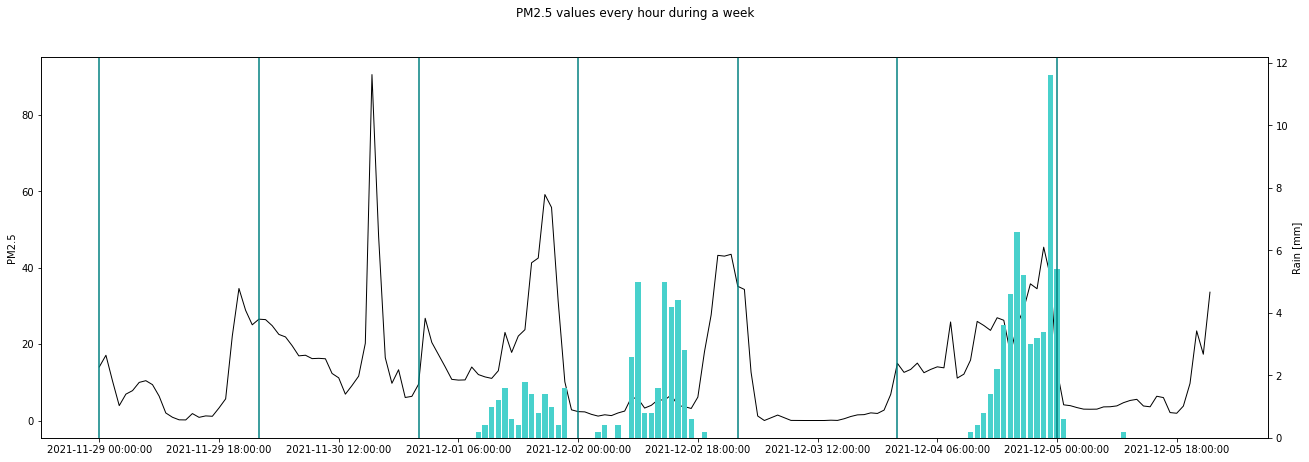

In [ ]:
data_PM2 = df_par['PM2.5']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM2, color='black', linewidth=1)
ax1.set_ylabel('PM2.5', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM2.5 values every hour during a week')
plt.show()

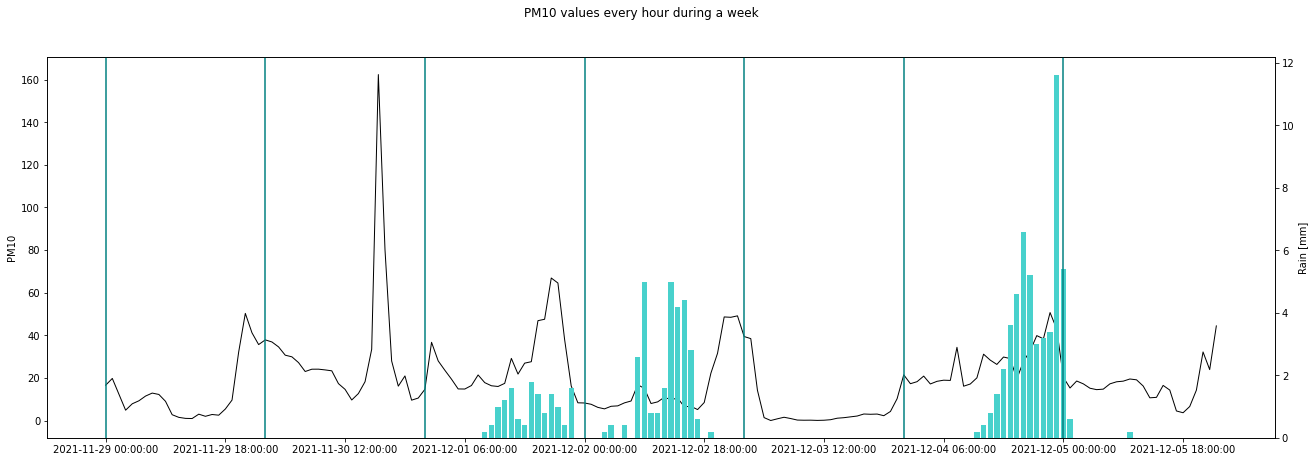

In [ ]:
data_PM10 = df_par['PM10']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM10, color='black', linewidth=1)
ax1.set_ylabel('PM10', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM10 values every hour during a week')
plt.show()

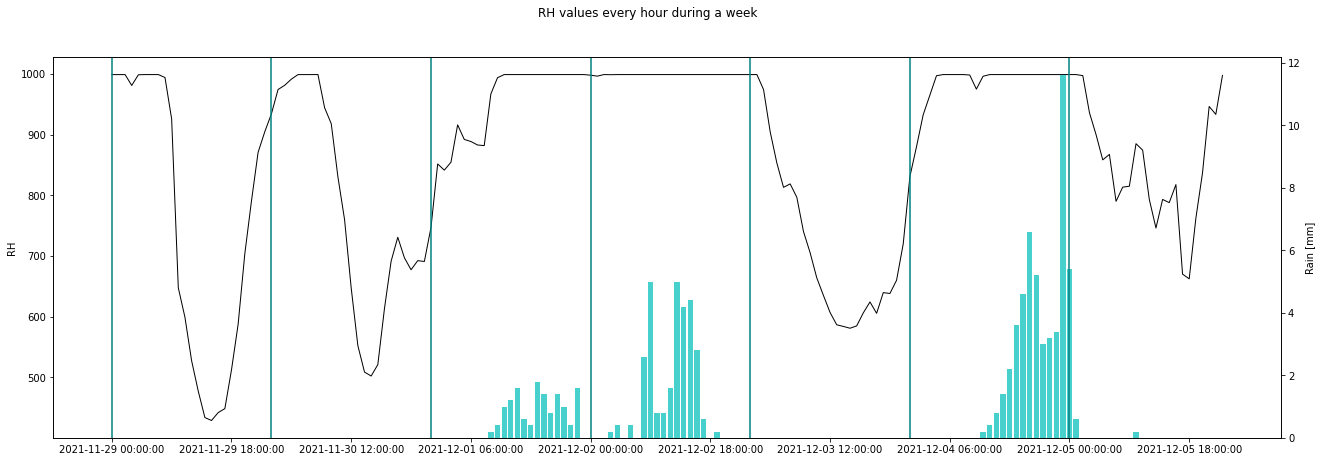

In [ ]:
data_RH = df_par['RH']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_RH, color='black', linewidth=1)
ax1.set_ylabel('RH', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('RH values every hour during a week')
plt.show()

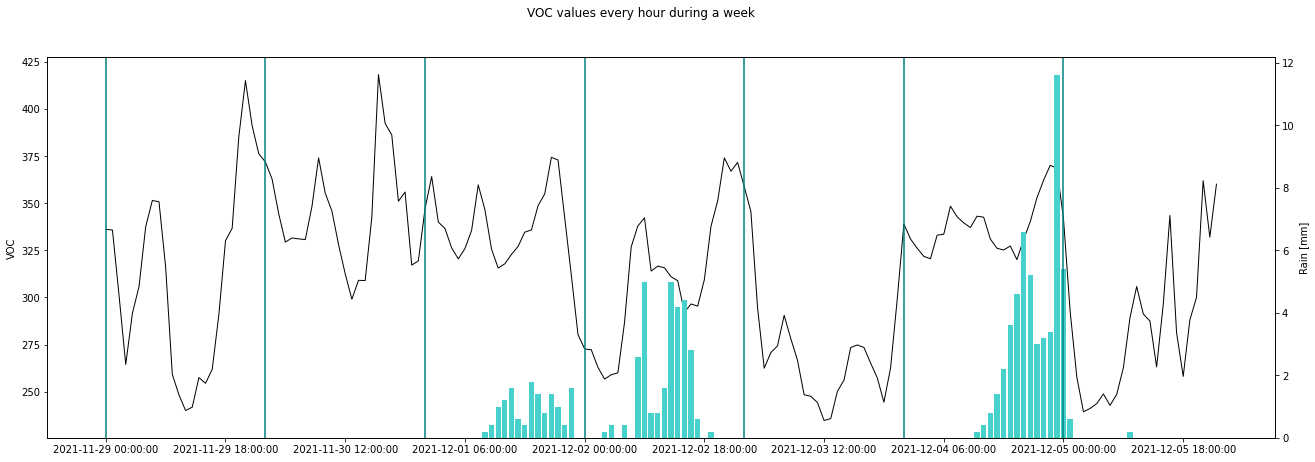

In [ ]:
data_VOC = df_par['VOC']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_VOC, color='black', linewidth=1)
ax1.set_ylabel('VOC', color='black')
ax2 = ax1.twinx() 
ax2.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('VOC values every hour during a week')
plt.show()

Wind

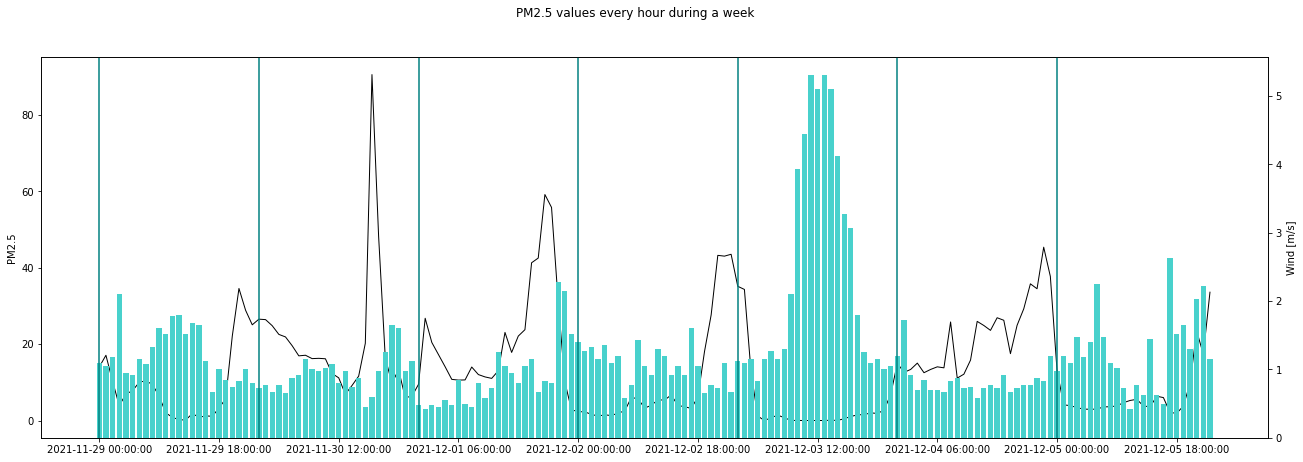

In [ ]:
data_PM2 = df_par['PM2.5']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM2, color='black', linewidth=1)
ax1.set_ylabel('PM2.5', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM2.5 values every hour during a week')
plt.show()

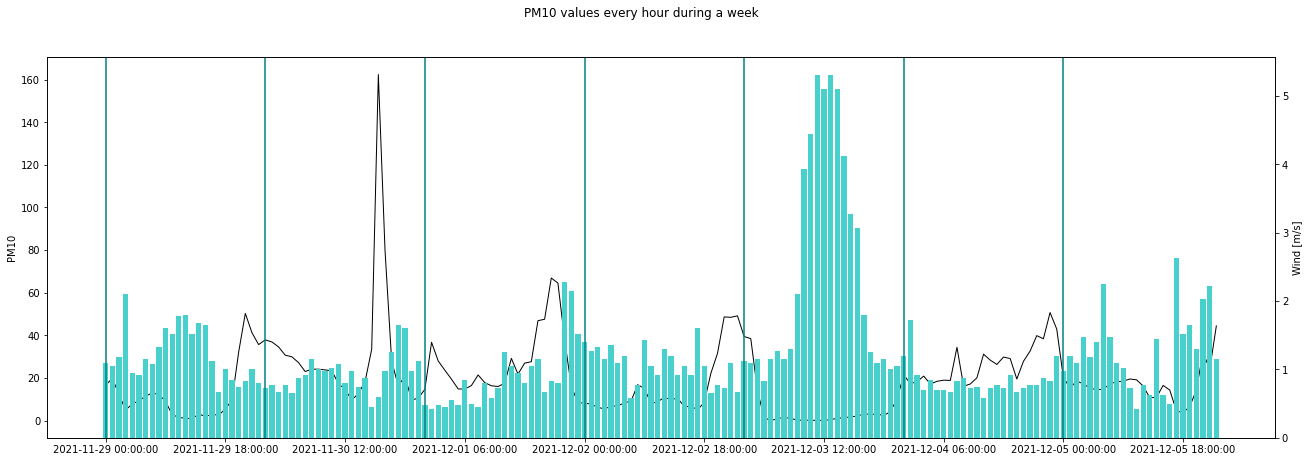

In [ ]:
data_PM10 = df_par['PM10']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM10, color='black', linewidth=1)
ax1.set_ylabel('PM10', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM10 values every hour during a week')
plt.show()

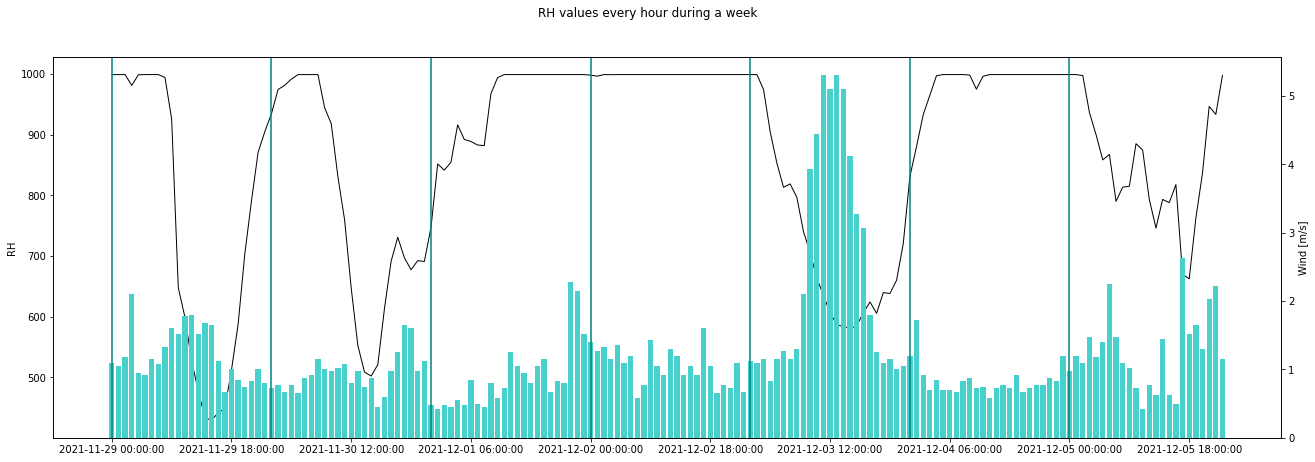

In [ ]:
data_RH = df_par['RH']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_RH, color='black', linewidth=1)
ax1.set_ylabel('RH', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('RH values every hour during a week')
plt.show()

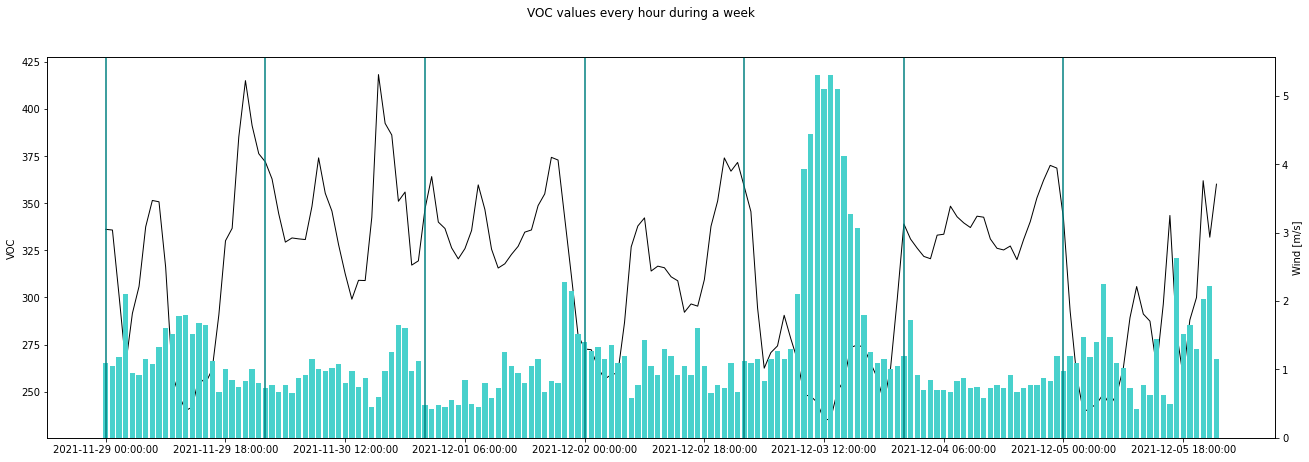

In [ ]:
data_VOC = df_par['VOC']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax1.plot(df_par.index.strftime('%Y-%m-%d %H:%M:%S'),data_VOC, color='black', linewidth=1)
ax1.set_ylabel('VOC', color='black')
ax2 = ax1.twinx() 
ax2.bar(wind_df.index, data_wind, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [m/s]', color='black')
for i in range(len(par_index)):
  plt.axvline(par_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a day', color='teal')
x_ticks = np.arange(0, len(data_PM2), 18)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('VOC values every hour during a week')
plt.show()

1 month:

In [ ]:
import pandas as pd
import psycopg2
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='45432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('6 hour', c."Dates" ) as "bucket", 
  avg(c."PM2.5") as "PM2.5" , avg(c."PM10") as "PM10", avg(c."RH") as "RH", avg(c."VOC") as "VOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-11-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-12-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('PM2.5'::varchar), ('PM10'::varchar), ('RH'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "PM2.5" float,"PM10" float, "RH" float, "VOC" float))  c 
group by bucket
order by bucket asc;
 """
df_par_month = pd.read_sql(query, conn)
df_par_month= df_par_month.rename(columns={'bucket': 'Dates'})
df_par_month=df_par_month.set_index('Dates')
europe = pytz.timezone('Europe/Rome')
df_par_month.index = df_par_month.index.tz_localize(pytz.utc).tz_convert(europe)
#fix temp int
display(df_par_month)


,PM2.5,PM10,RH,VOC
Dates,,,,
2021-10-01 02:00:00+02:00,3.568807,5.114679,636.509174,256.105505
2021-10-01 08:00:00+02:00,1.123348,3.207048,566.585903,270.048458
2021-10-01 14:00:00+02:00,0.470339,1.766949,349.877119,290.148305
2021-10-01 20:00:00+02:00,1.923077,5.283654,596.024038,311.163462
2021-10-02 02:00:00+02:00,3.785714,7.627551,852.969388,320.959184
...,...,...,...,...
2021-10-31 02:00:00+02:00,32.812227,40.043668,853.253275,364.720524
2021-10-31 07:00:00+01:00,18.525641,21.482906,847.726496,320.688034
2021-10-31 13:00:00+01:00,6.902954,9.544304,541.763713,271.468354


In [ ]:
df_par_month_index=df_par_month.index
parmonth_index=[]
for i in range(len(df_par_month_index)):
  if(i%28==0):
    parmonth_index.append(df_par_month_index[i])
print(parmonth_index)

[Timestamp('2021-10-01 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-08 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-15 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-22 02:00:00+0200', tz='Europe/Rome'), Timestamp('2021-10-29 02:00:00+0200', tz='Europe/Rome')]


Rain

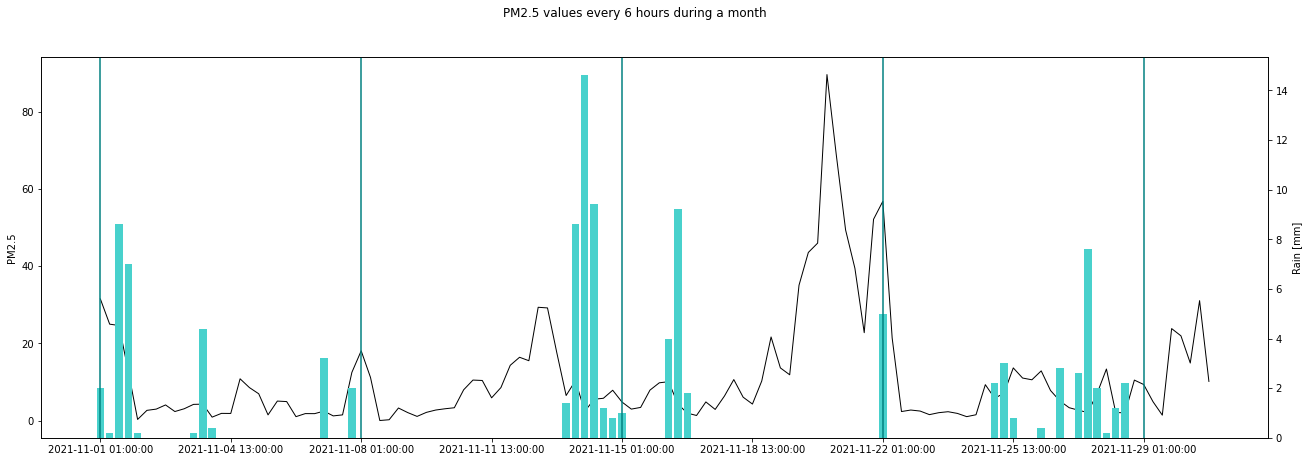

In [ ]:
data_PM2 = df_par_month['PM2.5']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM2, color='black', linewidth=1)
ax1.set_ylabel('PM2.5', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM2.5 values every 6 hours during a month')
plt.show()

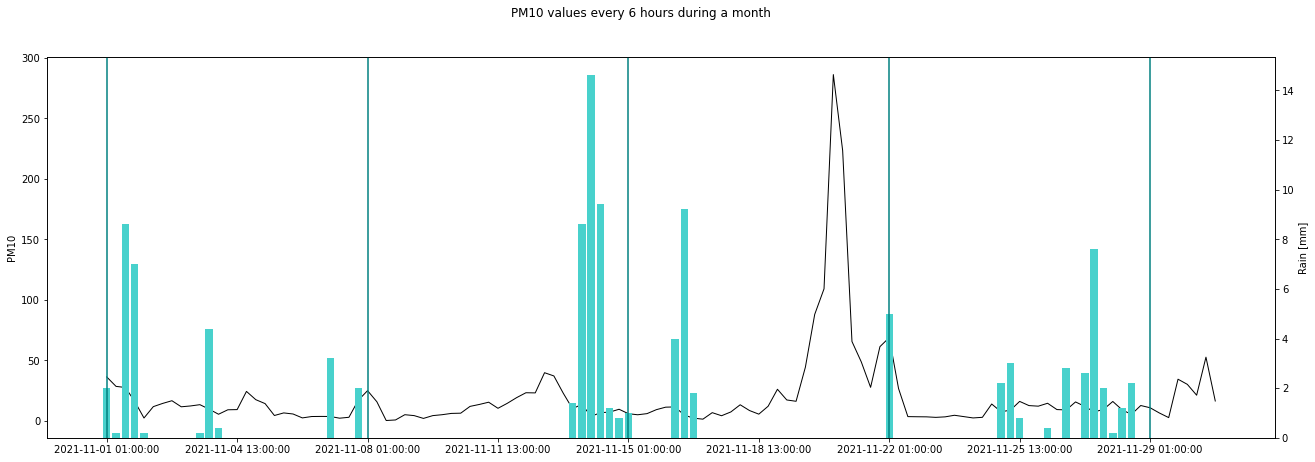

In [ ]:
data_PM10 = df_par_month['PM10']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM10, color='black', linewidth=1)
ax1.set_ylabel('PM10', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM10 values every 6 hours during a month')
plt.show()

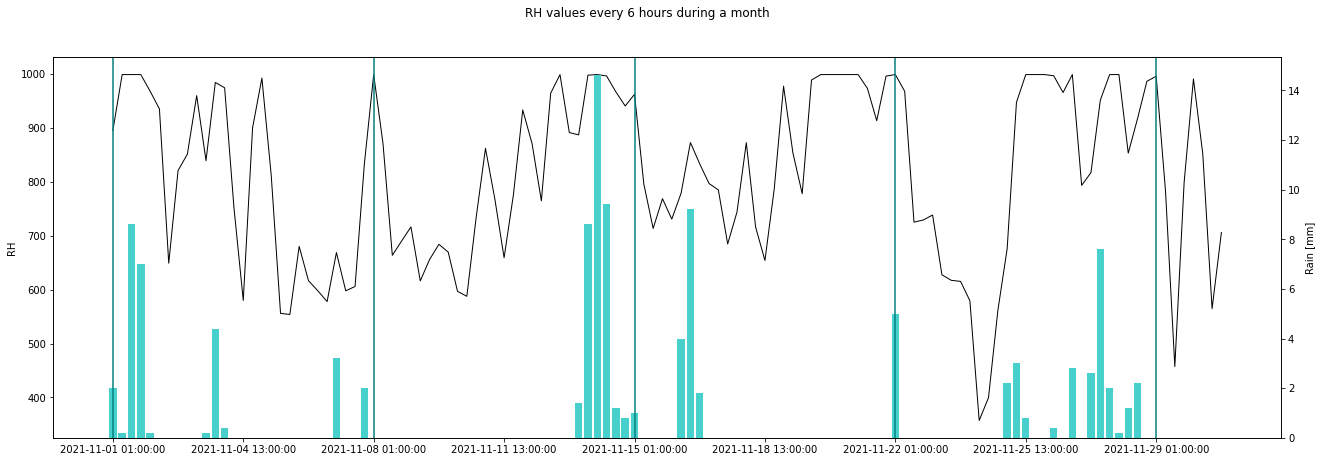

In [ ]:
data_RH = df_par_month['RH']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_RH, color='black', linewidth=1)
ax1.set_ylabel('RH', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('RH values every 6 hours during a month')
plt.show()

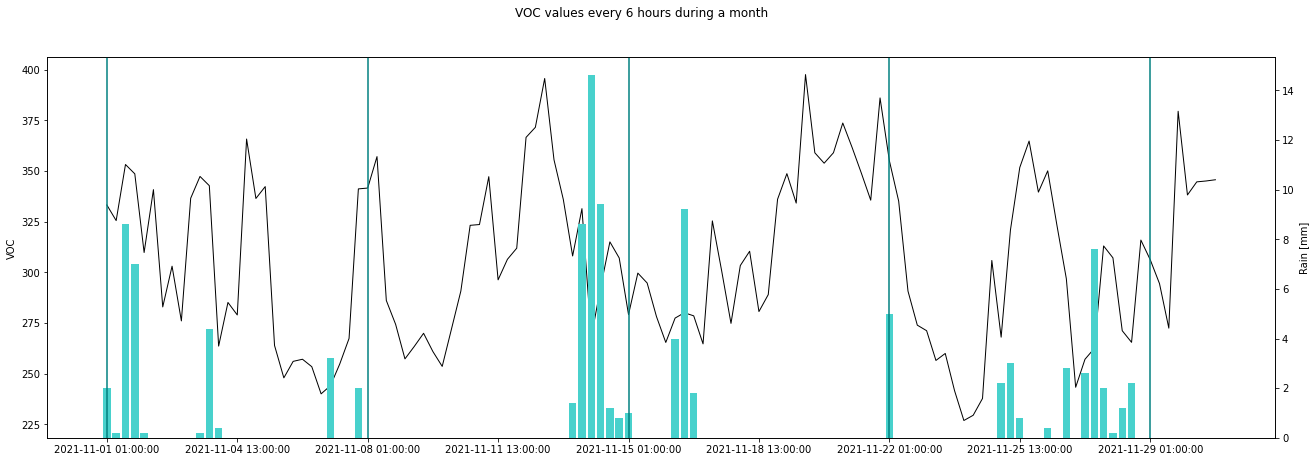

In [ ]:
data_VOC = df_par_month['VOC']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(rain_df_month.index, data_rain_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Rain [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_VOC, color='black', linewidth=1)
ax1.set_ylabel('VOC', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_T), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('VOC values every 6 hours during a month')
plt.show()

Wind

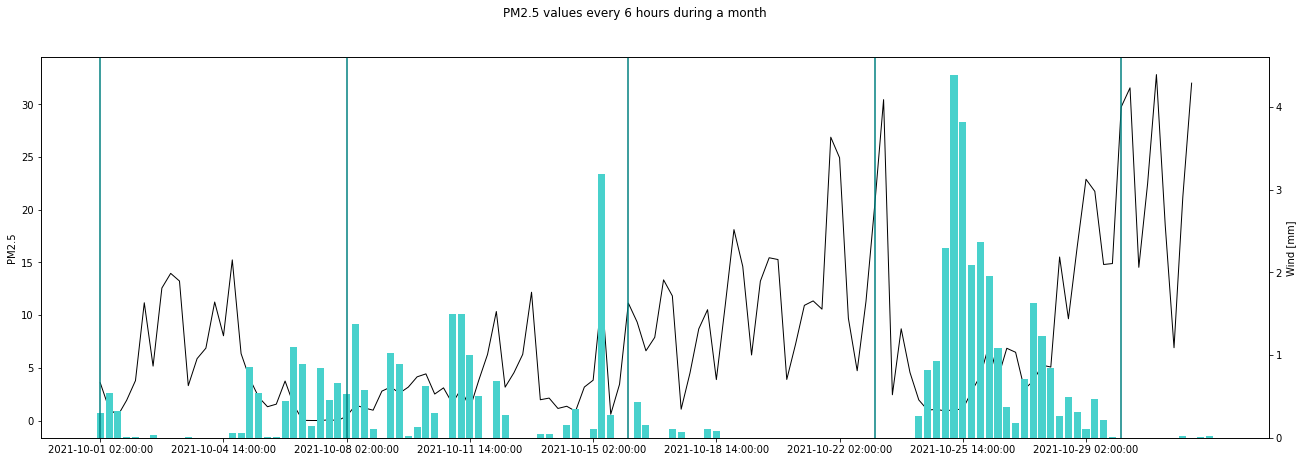

In [ ]:
data_PM2 = df_par_month['PM2.5']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM2, color='black', linewidth=1)
ax1.set_ylabel('PM2.5', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_PM2), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM2.5 values every 6 hours during a month')
plt.show()

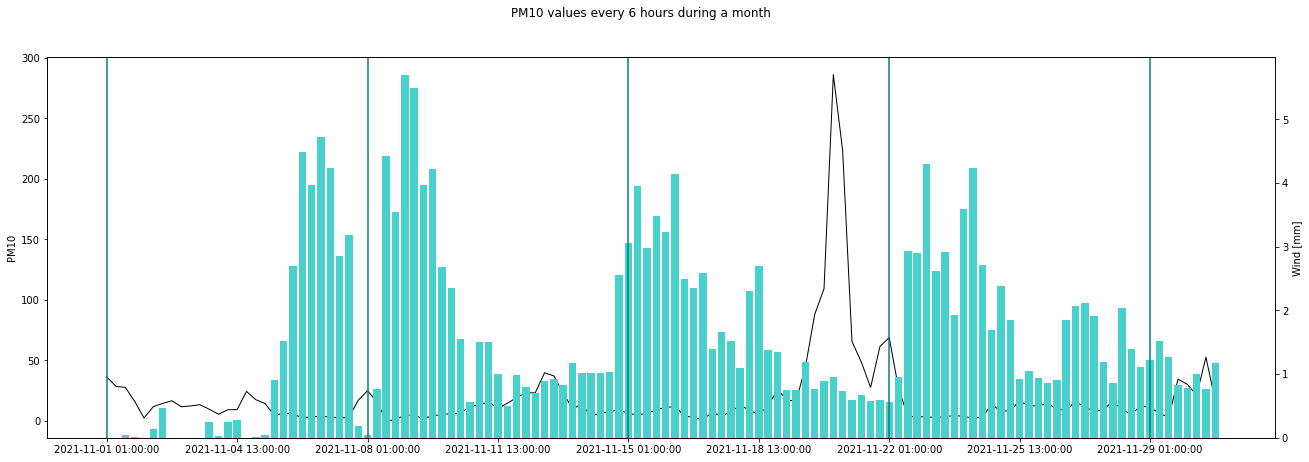

In [ ]:
data_PM10 = df_par_month['PM10']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_PM10, color='black', linewidth=1)
ax1.set_ylabel('PM10', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_PM10), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('PM10 values every 6 hours during a month')
plt.show()

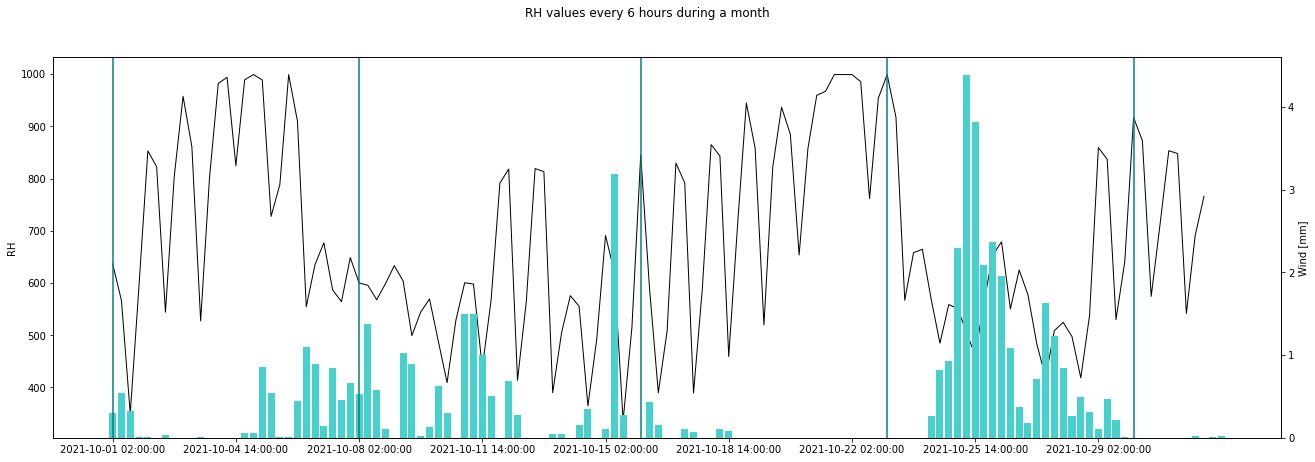

In [ ]:
data_RH = df_par_month['RH']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_RH, color='black', linewidth=1)
ax1.set_ylabel('RH', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_RH), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('RH values every 6 hours during a month')
plt.show()

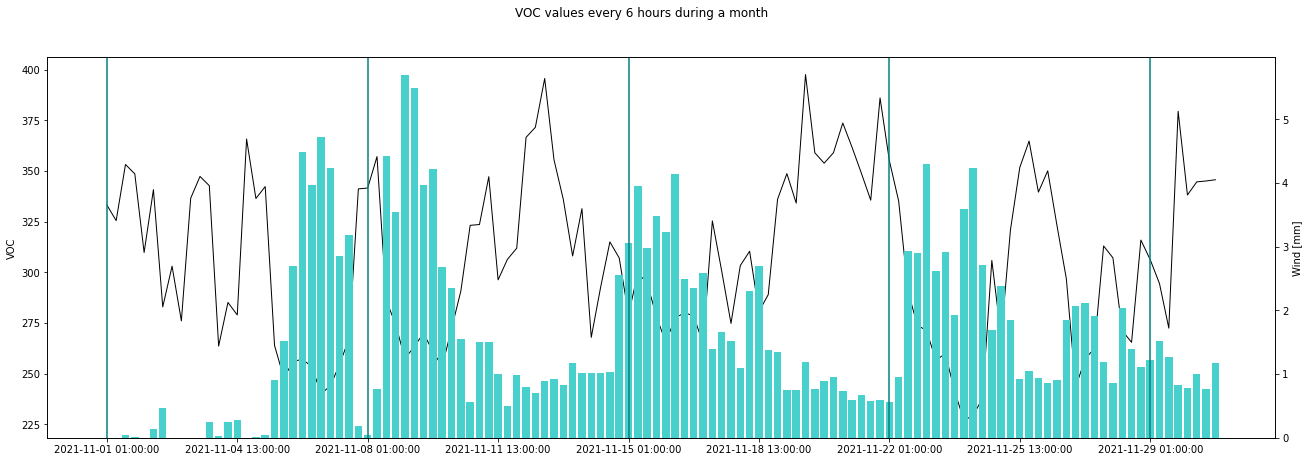

In [ ]:
data_VOC = df_par_month['VOC']
fig, ax1 = plt.subplots(figsize=(22, 7))
ax2 = ax1.twinx() 
plt.bar(wind_df_month.index, data_wind_month, color='mediumturquoise', linewidth=1)
ax2.set_ylabel('Wind [mm]', color='black')
ax1.plot(df_par_month.index.strftime('%Y-%m-%d %H:%M:%S'),data_VOC, color='black', linewidth=1)
ax1.set_ylabel('VOC', color='black')
for i in range(len(parmonth_index)):
  plt.axvline(parmonth_index[i].strftime('%Y-%m-%d %H:%M:%S')	, label='a week', color='teal')
x_ticks = np.arange(0, len(data_VOC), 14)
plt.xticks(x_ticks)
# Decorations
plt.suptitle('VOC values every 6 hours during a month')
plt.show()

# Rain daily values

week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Precipitazione [mm],Tipo Dato
Date,,
2021-09-20,2.0,P
2021-09-21,0.0,P
2021-09-22,0.0,P
2021-09-23,0.0,P
2021-09-24,0.0,P
2021-09-25,0.0,P
2021-09-26,48.4,P


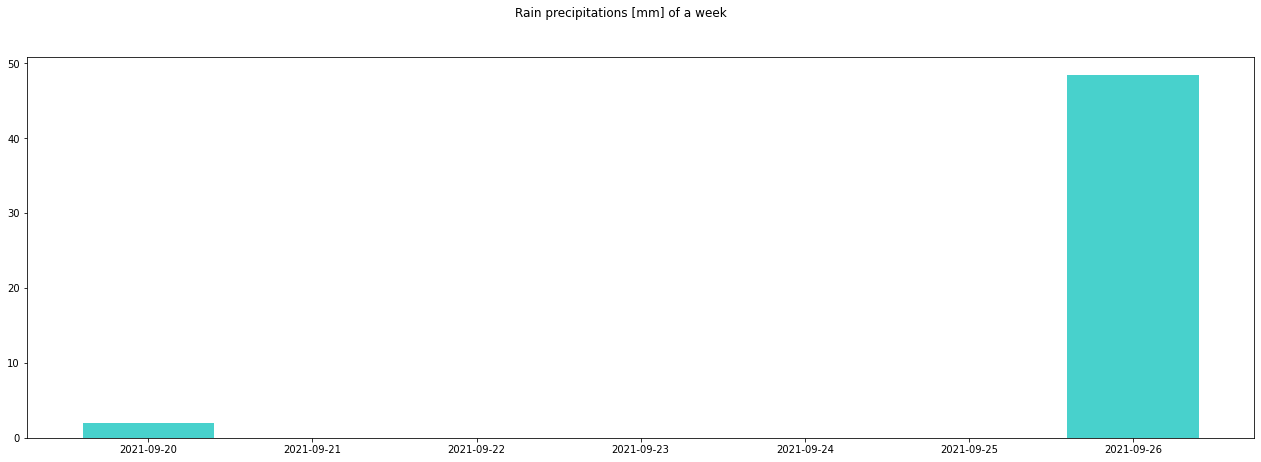

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

  
# creating a data frame
rain_df = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/prec_TOS01001205.csv')
for i in range(len(rain_df)):
  rain_df['Date'][i]=datetime.datetime.strptime(rain_df['Date'][i], "%d/%m/%Y").strftime("%Y-%m-%d")
rain_df=rain_df.set_index('Date')
rain_df=rain_df.loc['2021-09-20':'2021-09-26']
display(rain_df)

# Plot
data_rain=rain_df[' Precipitazione [mm]']
plt.figure(figsize=(22, 7))
plt.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 7, 1)
plt.xticks(x_ticks)
plt.suptitle('Rain precipitations [mm] of a week')
plt.show()

plt.tight_layout();

month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Precipitazione [mm],Tipo Dato
Date,,
2021-08-30,0.0,P
2021-08-31,0.0,P
2021-09-01,0.0,P
2021-09-02,0.0,P
2021-09-03,0.0,P
2021-09-04,2.6,P
2021-09-05,0.0,P
2021-09-06,0.0,P
2021-09-07,0.0,P


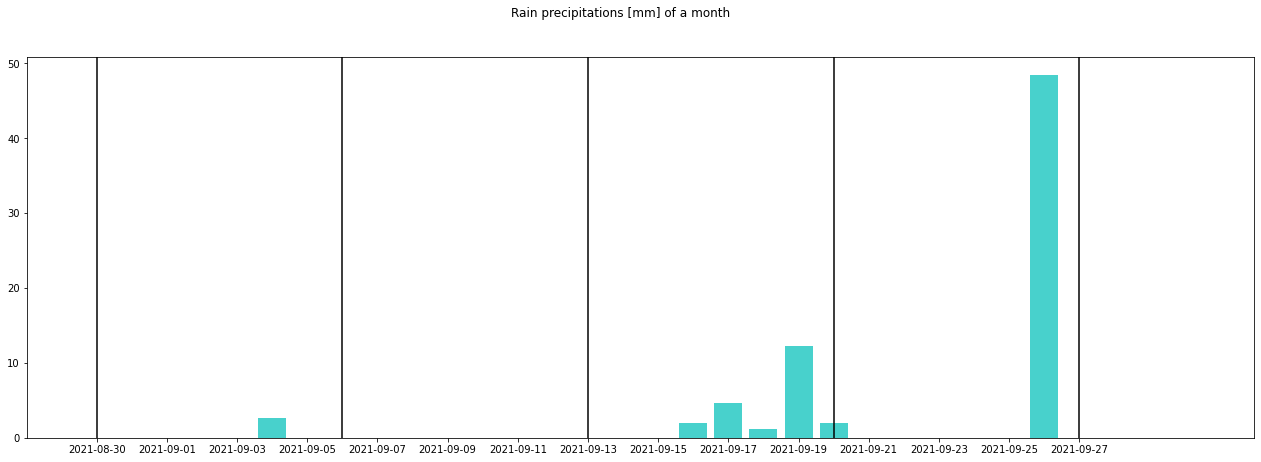

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

  
# creating a data frame
rain_df = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/prec_TOS01001205.csv')
for i in range(len(rain_df)):
  rain_df['Date'][i]=datetime.datetime.strptime(rain_df['Date'][i], "%d/%m/%Y").strftime("%Y-%m-%d")
rain_df=rain_df.set_index('Date')
rain_df=rain_df.loc['2021-08-30':'2021-09-30']
display(rain_df)

# Plot
data_rain=rain_df[' Precipitazione [mm]']
plt.figure(figsize=(22, 7))
plt.bar(rain_df.index, data_rain, color='mediumturquoise', linewidth=1)
# Decorations
x_ticks = np.arange(0, 30, 2)
x_line = np.arange(0, 30, 7)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a week', color='black')
plt.xticks(x_ticks)
plt.suptitle('Rain precipitations [mm] of a month')
plt.show()

plt.tight_layout();

# Wind daily values

week

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

  
# creating a data frame
wind_df = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/anemo_TOS01001205.csv')
wind_df=wind_df.set_index('Date')
wind_df=wind_df.loc['20/09/2021':'26/09/2021']
display(wind_df)
wind_df['Vel Max [m/s]']

# Plot
data_wind_med=wind_df[' Vel Med [m/s]']
data_wind_max=wind_df['Vel Max [m/s]']
plt.figure(figsize=(22, 7))
plt.bar(data_wind_max.index,data_wind_max, color='blue', linewidth=1)
plt.bar(data_wind_med.index,data_wind_med, color='teal', linewidth=1)
# Decorations
x_ticks = np.arange(0, 7, 1)
plt.xticks(x_ticks)
plt.suptitle('Wind velocity [m/s], teal:med, blue:max')
plt.show()

plt.tight_layout();

KeyError: ignored

,Vel Med [m/s],Dir Med,Vel Max [m/s]
Date,,,
30/08/2021,0.3,O,7.5
31/08/2021,0.4,NO,6.3
01/09/2021,0.2,N,4.8
02/09/2021,1.0,NE,6.5
03/09/2021,0.7,E,6.4
04/09/2021,0.2,N,4.0
05/09/2021,0.3,NE,5.8
06/09/2021,0.4,N,6.2
07/09/2021,0.3,NO,7.9


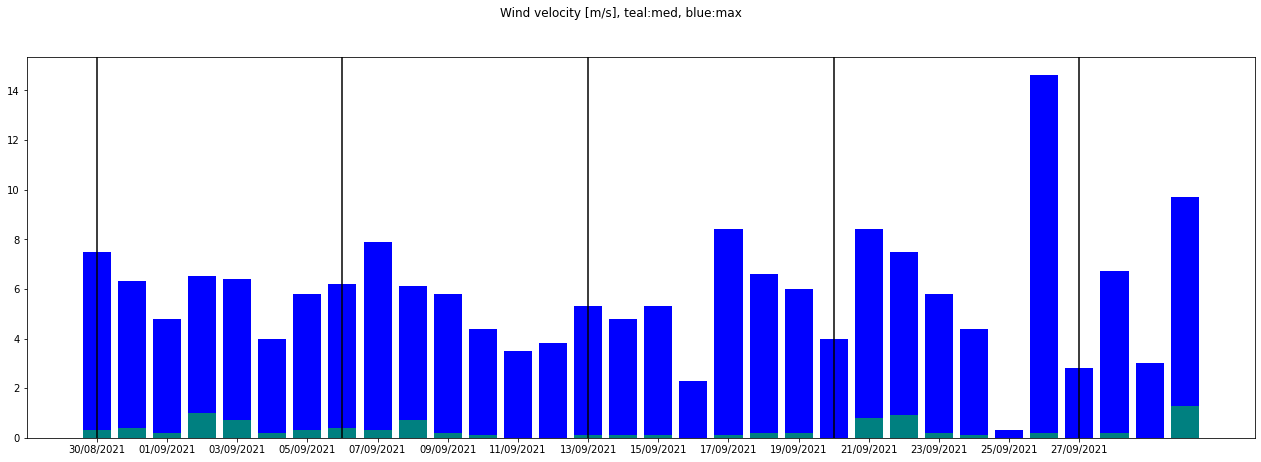

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

  
# creating a data frame
wind_df = pd.read_csv('https://raw.githubusercontent.com/marcochisci/Anomaly_detection/main/anemo_TOS01001205.csv')
wind_df=wind_df.set_index('Date')
wind_df=wind_df.loc['30/08/2021':'30/09/2021']
display(wind_df)
wind_df['Vel Max [m/s]']

# Plot
data_wind_med=wind_df[' Vel Med [m/s]']
data_wind_max=wind_df['Vel Max [m/s]']
plt.figure(figsize=(22, 7))
plt.bar(data_wind_max.index,data_wind_max, color='blue', linewidth=1)
plt.bar(data_wind_med.index,data_wind_med, color='teal', linewidth=1)
# Decorations
x_ticks = np.arange(0, 30, 2)
x_line= np.arange(0,30,7)
for i in range(len(x_line)):
  plt.axvline(x_line[i]	, label='a week', color='black')
plt.xticks(x_ticks)
plt.suptitle('Wind velocity [m/s], teal:med, blue:max')
plt.show()

plt.tight_layout();